In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(stringr))
library(parallel)
library(pheatmap)

# Female

In [279]:
# FEMALE
deseq2_result_Y1D0<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
# MALE
#deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [280]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female"

In [281]:
# Subset for genes of interest
genes_of_interest <- c('G0S2','TNF', 'IL1B', 'NR4A1', 'PTGS2', 'BCL2A1', 'BCL6', 'NR4A1', 'METRNL', 'TNFRSF1B',
                                      'FKBP5', 'RBP7', 'UBE2D1', 'FCGR3A', 'CCL4', 'CCL4L2','NFKBID', 'LGALS2', 'CCR1','RASGEF1B', 
                                      'CXCL8', 'NLRP3', 'KLF6', 'EIF1AX', 'JUND')

In [282]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(contrast=="cohort.cohortGuid",
       #Direction=="BR2",
      celltype=="IL1B+ CD14 monocyte",
      gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [283]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [284]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0", subject.biologicalSex == "Female" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [285]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female"

In [286]:
celltype_list <- lapply(df_list, function(df) { df <- df[deseq2_result_Y1D0_subset$gene, grep("IL1B+ CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [287]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [288]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [289]:
library(RColorBrewer)
library(viridis)

In [290]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

In [291]:
mat_col=meta_data_subset[c("cohort.cohortGuid","CMV", "subject.biologicalSex")]

In [292]:
# min_cutoff <- -3
# max_cutoff <- 3

# breaks <- seq(min_cutoff, max_cutoff, length.out = 100)
# if (min(data_matrix) < min_cutoff) {
#   breaks <- c(min(meta_data_subset), breaks)
# }
# if (max(meta_data_subset) > max_cutoff) {
#   breaks <- c(breaks, max(meta_data_subset))
# }

ERROR: Error in eval(expr, envir, enclos): object 'data_matrix' not found


In [296]:
exp_matrix_female<-exp_matrix[rownames(meta_data_subset)]

In [299]:
meta_data_subset

,X,Unnamed..0,lastUpdated,sample.id,sample.bridgingControl,sample.sampleKitGuid,sample.visitName,sample.visitDetails,sample.drawDate,sample.daysSinceFirstVisit,⋯,subject.race,subject.subjectGuid,cohort.cohortGuid,sample.diseaseStatesRecordedAtVisit,pbmc_sample_id,subject.covidVaxDose1.daysSinceFirstVisit,subject.covidVaxDose2.daysSinceFirstVisit,Covid_exclusion,subjectGuid,CMV
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PB00001-01,0,1,2024-05-10T17:12:44.959Z,f499ff83-e513-4d24-a10f-151348269fff,False,KT00001,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1001,BR1,NA,PB00001-01,NA,NA,no,BR1001,Negative
PB00003-01,2,3,2024-05-10T17:12:44.959Z,2db6fb3f-e3f4-454b-891b-9b068541b51d,False,KT00003,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1003,BR1,NA,PB00003-01,440,461,no,BR1003,Negative
PB00006-01,4,5,2024-05-10T17:12:44.959Z,eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f,False,KT00006,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1005,BR1,NA,PB00006-01,451,492,no,BR1005,Negative
PB00012-01,10,11,2024-05-10T17:12:44.959Z,fb3c3406-2797-4c31-b085-37d8138099a3,False,KT00012,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1008,BR1,NA,PB00012-01,469,494,no,BR1008,Positive
PB00023-05,21,22,2024-05-10T17:12:44.959Z,70146ae1-7568-4d58-9744-ae42cdf3af5a,False,KT00023,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-11-01T00:00:00Z,0,⋯,Caucasian,BR1009,BR1,NA,PB00023-05,502,524,no,BR1009,Negative
PB00022-01,20,21,2024-05-10T17:12:44.959Z,dedcaa14-0aa3-403b-9e13-475e715f0d69,False,KT00022,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-11-01T00:00:00Z,0,⋯,Caucasian,BR1010,BR1,NA,PB00022-01,491,519,no,BR1010,Positive
PB00030-02,28,29,2024-05-10T17:12:44.959Z,42756527-f764-4e83-ac50-762ce216966a,False,KT00030,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-12-01T00:00:00Z,0,⋯,Caucasian,BR1013,BR1,NA,PB00030-02,443,466,no,BR1013,Negative
PB00031-05,29,30,2024-05-10T17:12:44.959Z,ac47e675-d550-418b-8bc5-8a5a132909a2,False,KT00031,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-12-01T00:00:00Z,0,⋯,Caucasian,BR1014,BR1,NA,PB00031-05,NA,NA,no,BR1014,Positive
PB00507-01,201,202,2024-05-10T17:12:44.959Z,724b5b21-7ab1-45cc-b5c3-6059bc9dc965,False,KT00507,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2020-10-01T00:00:00Z,258,⋯,Caucasian,BR1017,BR1,NA,PB00507-01,NA,NA,no,BR1017,Negative


In [297]:
exp_matrix_female


,PB00001-01,PB00003-01,PB00006-01,PB00012-01,PB00023-05,PB00022-01,PB00030-02,PB00031-05,PB00507-01,PB00366-01,⋯,PB00387-01,PB00393-01,PB00394-02,PB00516-01,PB00545-01,PB00541-01,PB00533-01,PB00557-01,PB00602-01,PB00599-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PTGS2,0.4266934,0.06349906,0.33721047,0.4829994,0.0000000,0.42579192,0.2770237,0.1616861,0.4106867,0.3523351,⋯,0.9906289,0.5388111,1.0867618,0.9014358,0.7915276,0.4939769,0.4157574,0.0000000,0.5533753,0.4964574
BCL2A1,0.9481724,0.96322671,1.03921045,1.2241480,0.8960602,1.09369351,1.6862510,1.0602842,0.7732675,0.7126993,⋯,1.0458761,1.8196602,1.2702707,1.5291438,1.6941516,1.2610035,1.1999229,0.0000000,1.1113097,1.3308464
NLRP3,0.1688363,0.25537076,0.43697227,0.7558058,0.3569142,0.59708918,0.5072406,0.4020133,0.4050620,0.7204973,⋯,0.8074836,0.5298243,0.4922708,0.4003541,0.9197032,0.4686736,0.5735300,0.0000000,0.4961413,0.5915625
G0S2,0.3337376,0.30764092,0.04824071,0.5757327,1.2758393,1.17237083,0.2731865,0.4266257,0.2475571,0.6162191,⋯,0.7306356,0.8431237,0.4724337,0.3214181,1.4902965,0.1029424,0.2577143,0.0000000,0.3638164,0.5785502
RASGEF1B,0.3769068,0.52562680,0.35590774,0.5199899,0.0000000,0.27453067,0.1196024,0.2488837,0.3013591,0.5207658,⋯,0.8130342,0.9672792,0.8716290,0.8644927,0.4133052,0.4778237,0.4305896,0.5627243,0.3479129,0.4187579
METRNL,0.3426711,0.19486058,0.34212464,0.4928724,0.0000000,0.66486736,0.4317326,0.8044130,0.6643430,0.5591649,⋯,0.8493705,1.2756169,0.7729113,1.0767650,0.6714393,0.3645967,0.4327647,0.0000000,0.5875585,0.7455237
BCL6,0.2906630,0.41174526,0.29903492,0.0000000,0.3569142,0.37425618,0.5456622,0.1616861,0.5814107,0.3399290,⋯,0.2917610,0.3360289,0.5710461,0.4618547,0.5301434,0.3086388,0.5602166,0.0000000,0.4732558,0.4819506
IL1B,0.7166560,0.66172964,1.47309585,0.8223424,1.0144351,1.07074945,0.8971501,0.8029923,1.0316457,0.9039111,⋯,2.0834389,1.4438117,1.3165346,2.1383759,2.1092034,0.7756743,1.3193737,0.0000000,1.2916855,1.1895882
NR4A1,0.2176656,0.41565199,0.23318922,0.8022231,0.0000000,0.38222097,0.0000000,0.6250105,0.4513266,0.3955753,⋯,1.0353266,1.0827671,0.9795750,0.6021663,0.6042776,0.1747595,0.4687612,0.0000000,0.3303776,0.6257451


In [293]:
exp_matrix

,PB00001-01,PB00003-01,PB00006-01,PB00012-01,PB00016-01,PB00022-01,PB00023-05,PB00030-02,PB00031-05,PB00166-01,⋯,PB00557-01,PB00561-04,PB00568-01,PB00569-01,PB00575-01,PB00599-01,PB00602-01,PB00621-01,PB00645-01,PB01425-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PTGS2,0.4266934,0.06349906,0.33721047,0.4829994,0.5115903,0.42579192,0.0000000,0.2770237,0.1616861,0.6757613,⋯,0.0000000,0.6812638,0.5827876,0.7332807,0.47078432,0.4964574,0.5533753,1.2982311,0.5204183,0.3277027
BCL2A1,0.9481724,0.96322671,1.03921045,1.2241480,0.9682139,1.09369351,0.8960602,1.6862510,1.0602842,1.2100614,⋯,0.0000000,1.5398524,0.8678644,0.8809833,1.33138480,1.3308464,1.1113097,1.1958907,0.3751335,0.8535119
NLRP3,0.1688363,0.25537076,0.43697227,0.7558058,0.4630318,0.59708918,0.3569142,0.5072406,0.4020133,0.2162837,⋯,0.0000000,0.4459599,0.1233639,0.3880842,0.14063406,0.5915625,0.4961413,0.6239812,0.3095141,0.2541834
G0S2,0.3337376,0.30764092,0.04824071,0.5757327,0.7263199,1.17237083,1.2758393,0.2731865,0.4266257,0.4056449,⋯,0.0000000,0.6389170,0.2633510,0.5135903,0.17038127,0.5785502,0.3638164,0.0000000,0.3514814,0.3746521
RASGEF1B,0.3769068,0.52562680,0.35590774,0.5199899,0.4839761,0.27453067,0.0000000,0.1196024,0.2488837,0.1518852,⋯,0.5627243,0.4316664,0.4070064,0.2267680,0.41365616,0.4187579,0.3479129,0.0000000,0.2557574,0.1457756
METRNL,0.3426711,0.19486058,0.34212464,0.4928724,0.7868728,0.66486736,0.0000000,0.4317326,0.8044130,0.2162837,⋯,0.0000000,0.6051854,0.5071497,0.6937812,0.80995178,0.7455237,0.5875585,0.6239812,0.3500622,0.3423413
BCL6,0.2906630,0.41174526,0.29903492,0.0000000,0.3504946,0.37425618,0.3569142,0.5456622,0.1616861,0.5169244,⋯,0.0000000,0.1544562,0.1204825,0.2551553,0.07181381,0.4819506,0.4732558,0.6239812,0.4662275,0.6189356
IL1B,0.7166560,0.66172964,1.47309585,0.8223424,0.8906700,1.07074945,1.0144351,0.8971501,0.8029923,1.3960463,⋯,0.0000000,1.2722028,0.6297747,0.7277127,0.64808911,1.1895882,1.2916855,0.8930783,0.9158428,1.6484703
NR4A1,0.2176656,0.41565199,0.23318922,0.8022231,0.6737500,0.38222097,0.0000000,0.0000000,0.6250105,0.0000000,⋯,0.0000000,0.3209205,0.8053828,0.7762267,0.66398583,0.6257451,0.3303776,0.7889910,0.4473165,0.1391469


In [219]:
#scaled_matrix <- apply(exp_matrix_input, 1, scale, center = FALSE)

In [294]:
breaks_sequence <- seq(2, -2, length.out = 100)


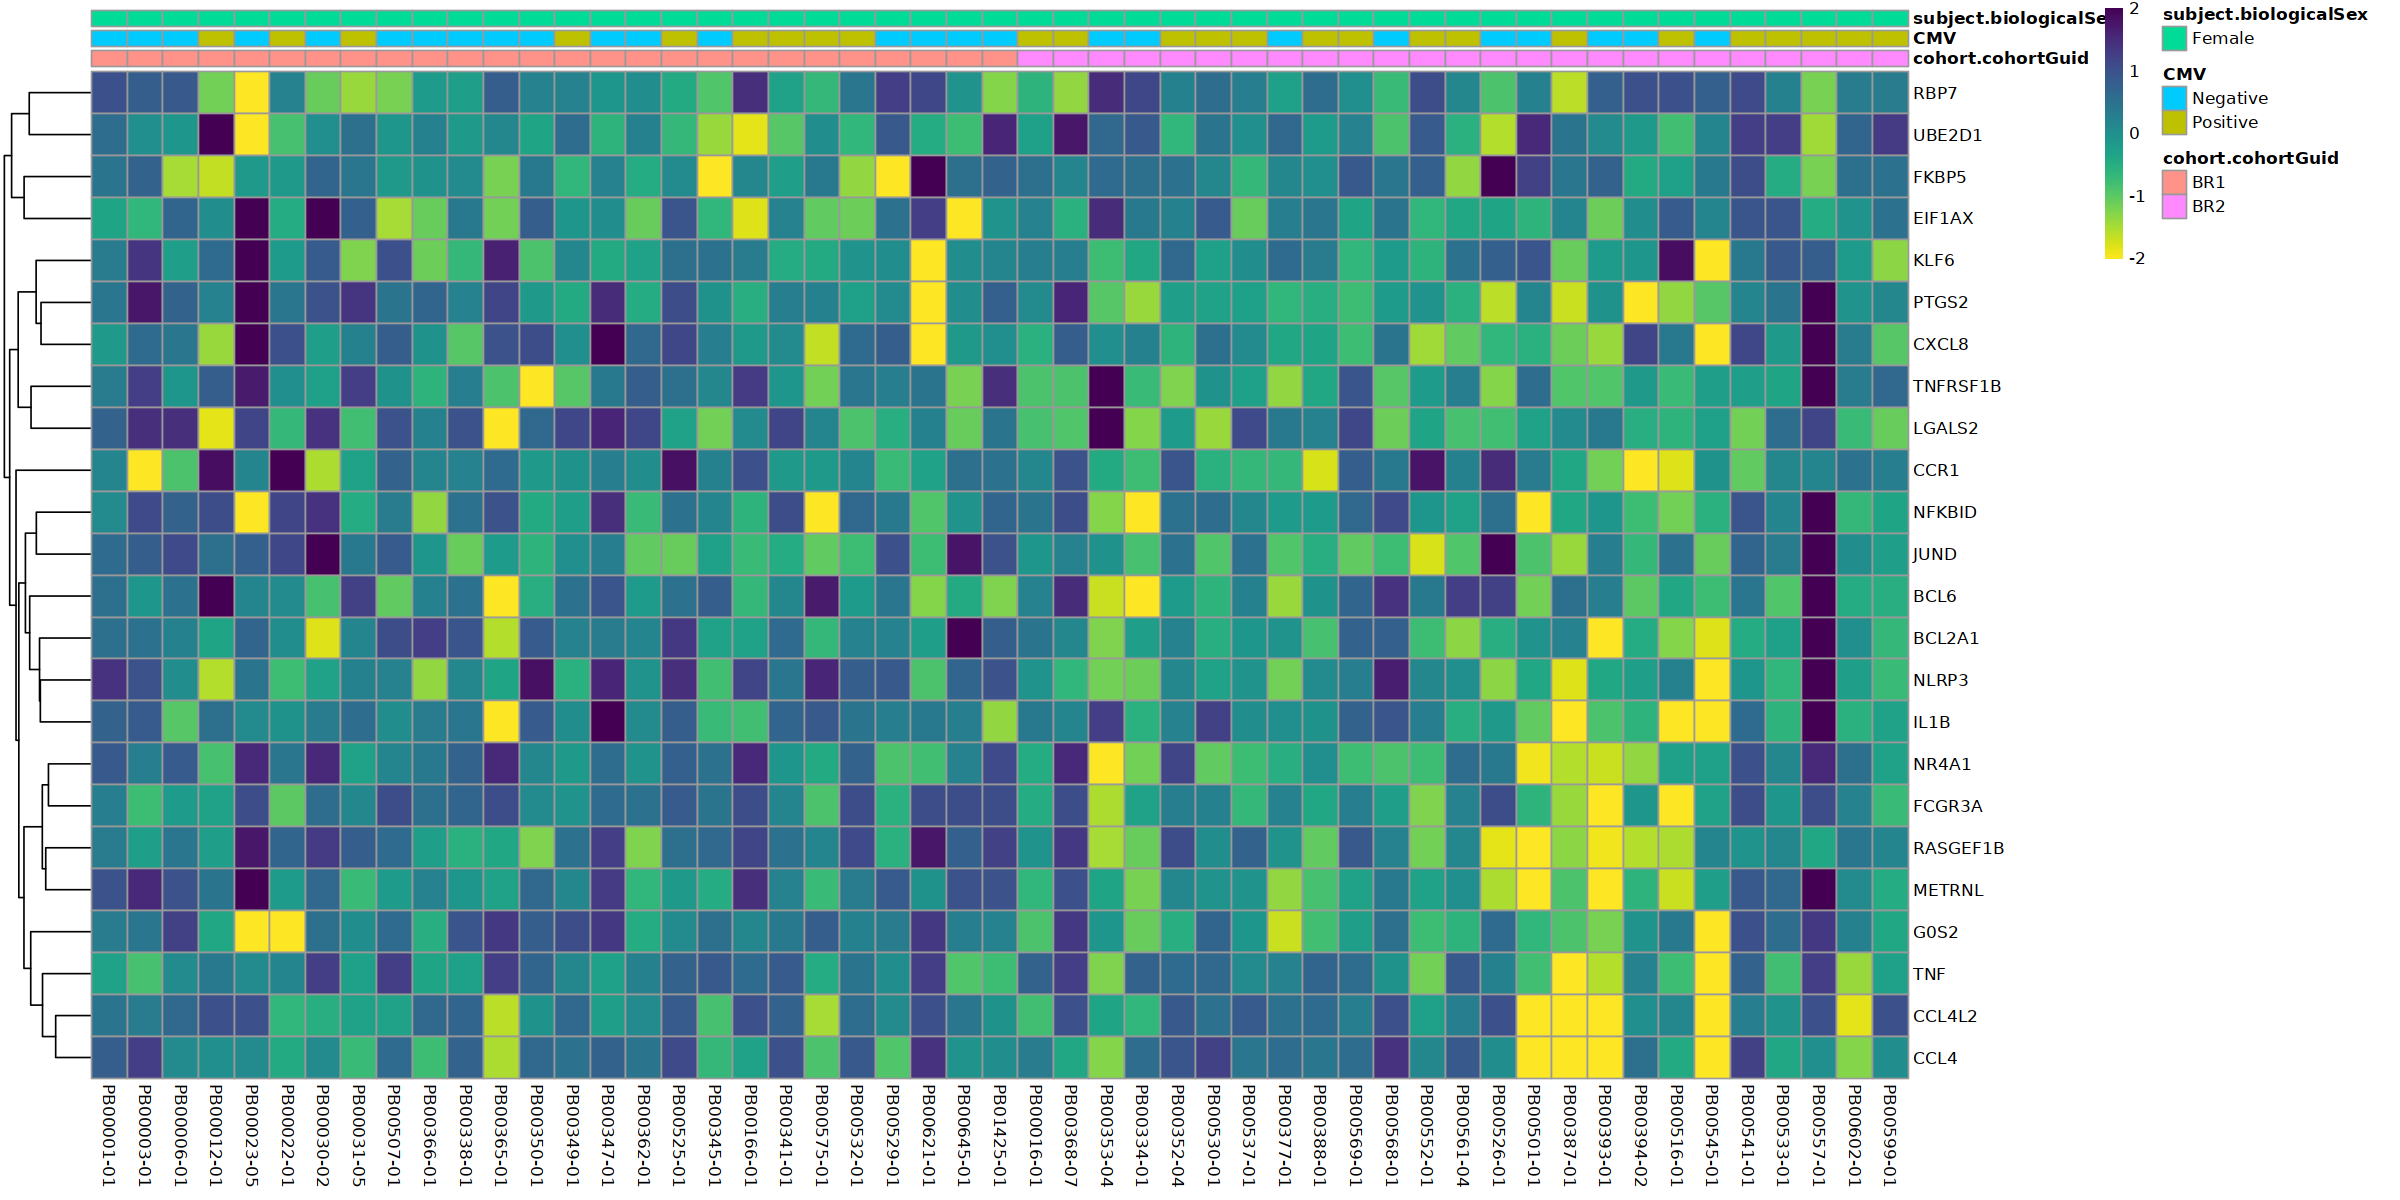

In [298]:
options(repr.plot.width = 20, repr.plot.height = 10)

pheatmap(exp_matrix_female,breaks=breaks_sequence,
         cluster_rows=TRUE, annotation_col= mat_col,
         cluster_cols=FALSE,color= viridis(100),
         scale='row' )

# Male

In [222]:
# male
deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [223]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0.4321027,-0.33851016,0.6221762,-0.5440744,0.5863902,0.9967281,cohort.cohortGuid,BR1,AL669831.5,ASDC,Male
2,2,2.1306270,-0.21090779,0.3400806,-0.6201701,0.5351458,0.9967281,cohort.cohortGuid,BR1,NOC2L,ASDC,Male
3,3,1.1454997,-0.39546356,0.5239595,-0.7547598,0.4503931,0.9967281,cohort.cohortGuid,BR1,ISG15,ASDC,Male
4,4,2.8187800,0.08086743,0.2866310,0.2821308,0.7778433,0.9967281,cohort.cohortGuid,BR2,SDF4,ASDC,Male
5,5,0.6591821,-0.77420752,0.5535811,-1.3985439,0.1619498,0.9967281,cohort.cohortGuid,BR1,B3GALT6,ASDC,Male
6,6,1.9946145,-0.09223559,0.3068931,-0.3005463,0.7637605,0.9967281,cohort.cohortGuid,BR1,UBE2J2,ASDC,Male


[1] "Male"

In [224]:
# Subset for genes of interest
genes_of_interest <- c('G0S2','TNF', 'IL1B', 'NR4A1', 'PTGS2', 'BCL2A1', 'BCL6', 'NR4A1', 'METRNL', 'TNFRSF1B',
                                      'FKBP5', 'RBP7', 'UBE2D1', 'FCGR3A', 'CCL4', 'CCL4L2','NFKBID', 'LGALS2', 'CCR1','RASGEF1B', 
                                      'CXCL8', 'NLRP3', 'KLF6', 'EIF1AX', 'JUND')

In [225]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(contrast=="cohort.cohortGuid",
       #Direction=="BR2",
      celltype=="IL1B+ CD14 monocyte",
      gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [226]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [227]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0", subject.biologicalSex == "Male" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [228]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Male"

In [229]:
celltype_list <- lapply(df_list, function(df) { df <- df[deseq2_result_Y1D0_subset$gene, grep("IL1B+ CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [230]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [231]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [232]:
library(RColorBrewer)
library(viridis)

In [233]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

In [234]:
mat_col=meta_data_subset[c("cohort.cohortGuid","CMV", "subject.biologicalSex")]

In [235]:
# min_cutoff <- -3
# max_cutoff <- 3

# breaks <- seq(min_cutoff, max_cutoff, length.out = 100)
# if (min(data_matrix) < min_cutoff) {
#   breaks <- c(min(meta_data_subset), breaks)
# }
# if (max(meta_data_subset) > max_cutoff) {
#   breaks <- c(breaks, max(meta_data_subset))
# }

ERROR: Error in eval(expr, envir, enclos): object 'data_matrix' not found


In [236]:
exp_matrix_male<-exp_matrix[rownames(meta_data_subset)]

In [237]:
exp_matrix_male


,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00025-04,PB00026-05,PB00514-01,PB00384-01,PB00041-01,PB00357-01,⋯,PB00563-01,PB00390-01,PB00369-01,PB00339-01,PB00383-01,PB00564-04,PB00520-01,PB00523-01,PB00623-01,PB00625-02
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LGALS2,1.32838510,1.4523858,1.31196994,0.9766266,1.6424108,0.9224126,0.4571101,0.91317316,0.7330808,0.6392210,⋯,0.9555038,1.5474013,1.1878079,0.22964092,1.7527360,1.5333838,1.5554775,0.8787968,1.9151243,1.8283399
RBP7,0.90596419,1.4339588,0.91497502,1.0952969,0.5648481,0.9322553,0.5098621,0.86851215,1.0001614,0.6316481,⋯,0.6764344,1.1792084,0.6291720,1.12957519,1.4929777,0.9321964,0.7278488,0.6334829,1.0665218,0.0000000
TNFRSF1B,1.38914300,1.4052601,1.00179177,1.2890295,2.0789684,1.4248434,1.5975101,1.40811231,1.2567737,1.5261099,⋯,0.7589835,2.1981788,1.3536026,1.65210685,1.3547906,1.1210320,1.6935079,1.6445230,1.3302164,1.3842485
FCGR3A,0.21814254,0.1845606,0.22347273,0.2043594,0.0000000,0.0000000,0.9697331,0.06385209,0.3625155,0.1532864,⋯,1.1484094,0.9722062,0.4406727,0.03138836,0.0000000,0.2293363,0.3546043,0.5790050,0.1871088,0.0000000
PTGS2,0.22664239,0.7218853,1.12896432,0.2435899,0.3981701,0.2858139,0.5105080,0.22221348,0.3804743,0.3321759,⋯,0.4412903,1.8878981,0.4637375,0.37197631,0.0000000,0.2650436,0.7887989,1.0765976,0.4040472,1.8283399
G0S2,0.96725026,0.4807413,0.62082292,0.3791453,0.6423676,0.2578667,0.3974221,0.97457623,0.6058224,0.0000000,⋯,0.7859333,0.3700707,0.1807983,0.92650957,0.5753652,0.3942291,0.3829695,1.3499558,0.7560172,1.2431300
NLRP3,0.34774061,0.6491407,0.40075560,0.3356846,0.3694343,0.4338880,0.7778616,0.52390948,0.2913548,0.4271145,⋯,0.6156404,0.2891770,0.2673842,0.56013049,0.2273024,0.5359545,0.3655392,0.5919386,0.6803066,0.9365256
IL1B,0.92546180,1.1028553,1.52857516,0.6090163,1.1092762,1.3183115,2.1677155,0.98186565,0.9784388,2.0744848,⋯,1.2335654,0.0000000,1.2249516,0.94847317,1.1592404,1.4175083,1.4173045,1.3294581,1.6577933,3.0959512
CCR1,0.22453245,0.8026628,0.93883224,0.4529188,0.5673561,0.3433826,0.3490750,0.34722631,0.6560765,0.7512475,⋯,0.1387495,0.8302908,0.5701431,0.66732750,0.3558729,0.6669801,1.2133182,0.4490235,0.5118937,0.0000000


In [238]:
#scaled_matrix <- apply(exp_matrix_input, 1, scale, center = FALSE)

In [239]:
breaks_sequence <- seq(2, -2, length.out = 100)


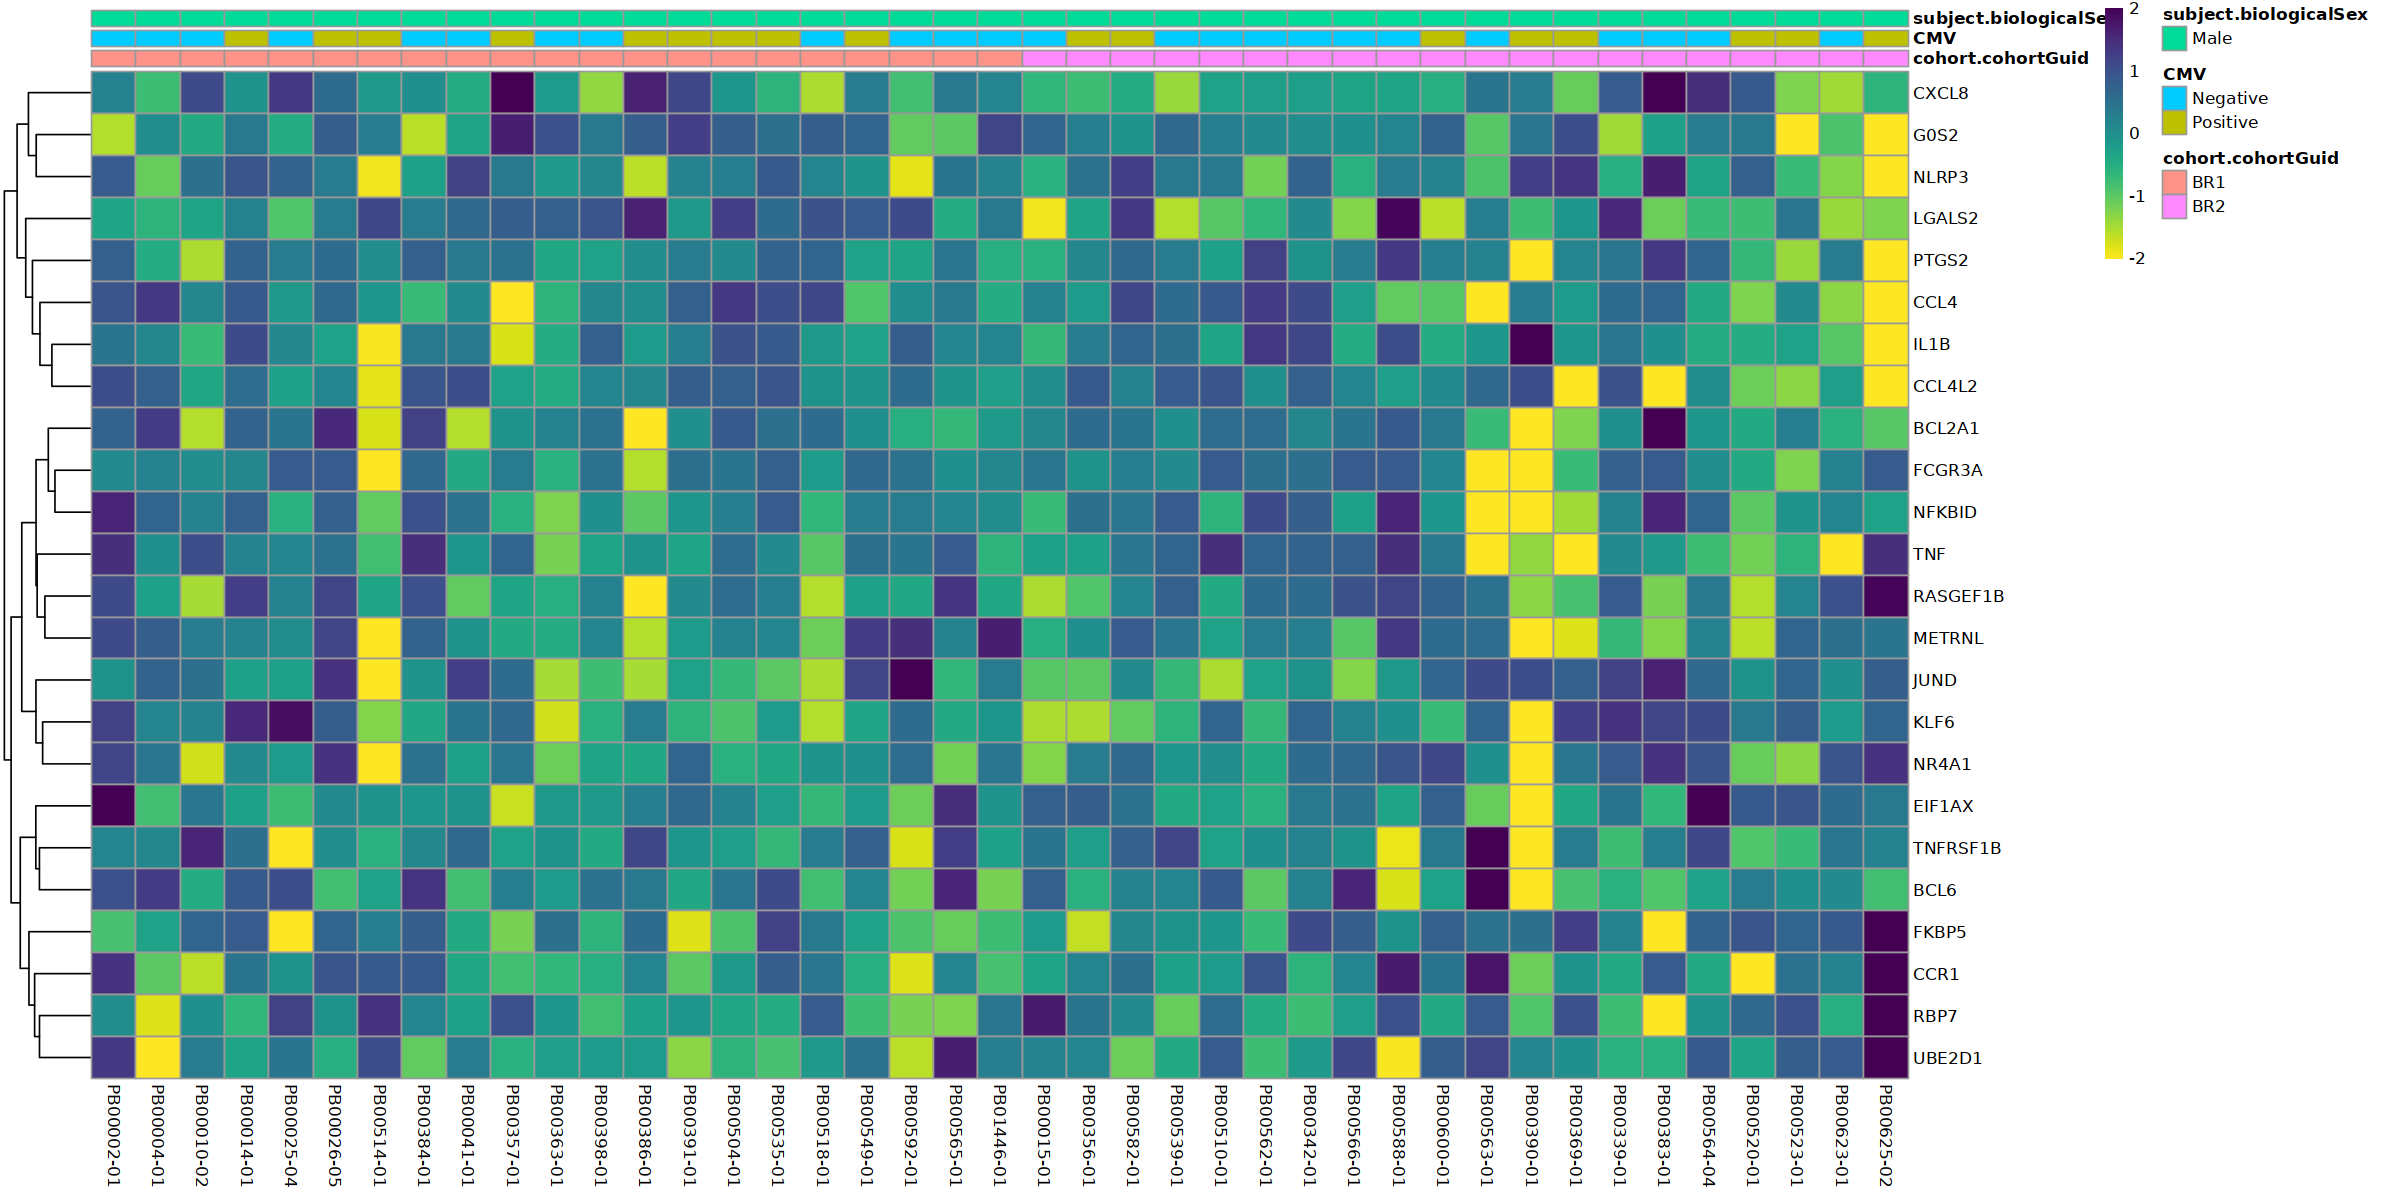

In [240]:
options(repr.plot.width = 20, repr.plot.height = 10)

pheatmap(exp_matrix[rownames(meta_data_subset)],breaks=breaks_sequence,
         cluster_rows=TRUE, annotation_col= mat_col,
         cluster_cols=FALSE,color= viridis(100),
         scale='row' )

# Together

In [315]:
# master deg list
deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/master_combined_DEG_list_all_celltypes_forfigs.csv')

In [316]:
exp_matrix_male$X <- rownames(exp_matrix_male)
head(exp_matrix_male)

,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00025-04,PB00026-05,PB00514-01,PB00384-01,PB00041-01,PB00357-01,⋯,PB00390-01,PB00369-01,PB00339-01,PB00383-01,PB00564-04,PB00520-01,PB00523-01,PB00623-01,PB00625-02,X
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
LGALS2,1.3283851,1.4523858,1.3119699,0.9766266,1.6424108,0.9224126,0.4571101,0.91317316,0.7330808,0.6392210,⋯,1.5474013,1.1878079,0.22964092,1.7527360,1.5333838,1.5554775,0.8787968,1.9151243,1.828340,LGALS2
RBP7,0.9059642,1.4339588,0.9149750,1.0952969,0.5648481,0.9322553,0.5098621,0.86851215,1.0001614,0.6316481,⋯,1.1792084,0.6291720,1.12957519,1.4929777,0.9321964,0.7278488,0.6334829,1.0665218,0.000000,RBP7
TNFRSF1B,1.3891430,1.4052601,1.0017918,1.2890295,2.0789684,1.4248434,1.5975101,1.40811231,1.2567737,1.5261099,⋯,2.1981788,1.3536026,1.65210685,1.3547906,1.1210320,1.6935079,1.6445230,1.3302164,1.384248,TNFRSF1B
FCGR3A,0.2181425,0.1845606,0.2234727,0.2043594,0.0000000,0.0000000,0.9697331,0.06385209,0.3625155,0.1532864,⋯,0.9722062,0.4406727,0.03138836,0.0000000,0.2293363,0.3546043,0.5790050,0.1871088,0.000000,FCGR3A
PTGS2,0.2266424,0.7218853,1.1289643,0.2435899,0.3981701,0.2858139,0.5105080,0.22221348,0.3804743,0.3321759,⋯,1.8878981,0.4637375,0.37197631,0.0000000,0.2650436,0.7887989,1.0765976,0.4040472,1.828340,PTGS2
G0S2,0.9672503,0.4807413,0.6208229,0.3791453,0.6423676,0.2578667,0.3974221,0.97457623,0.6058224,0.0000000,⋯,0.3700707,0.1807983,0.92650957,0.5753652,0.3942291,0.3829695,1.3499558,0.7560172,1.243130,G0S2


In [317]:
exp_matrix_female$X <- rownames(exp_matrix_female)
head(exp_matrix_female)

,PB00001-01,PB00003-01,PB00006-01,PB00012-01,PB00023-05,PB00022-01,PB00030-02,PB00031-05,PB00507-01,PB00366-01,⋯,PB00393-01,PB00394-02,PB00516-01,PB00545-01,PB00541-01,PB00533-01,PB00557-01,PB00602-01,PB00599-01,X
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PTGS2,0.4266934,0.06349906,0.33721047,0.4829994,0.0000000,0.4257919,0.2770237,0.1616861,0.4106867,0.3523351,⋯,0.5388111,1.0867618,0.9014358,0.7915276,0.4939769,0.4157574,0.0000000,0.5533753,0.4964574,PTGS2
BCL2A1,0.9481724,0.96322671,1.03921045,1.2241480,0.8960602,1.0936935,1.6862510,1.0602842,0.7732675,0.7126993,⋯,1.8196602,1.2702707,1.5291438,1.6941516,1.2610035,1.1999229,0.0000000,1.1113097,1.3308464,BCL2A1
NLRP3,0.1688363,0.25537076,0.43697227,0.7558058,0.3569142,0.5970892,0.5072406,0.4020133,0.4050620,0.7204973,⋯,0.5298243,0.4922708,0.4003541,0.9197032,0.4686736,0.5735300,0.0000000,0.4961413,0.5915625,NLRP3
G0S2,0.3337376,0.30764092,0.04824071,0.5757327,1.2758393,1.1723708,0.2731865,0.4266257,0.2475571,0.6162191,⋯,0.8431237,0.4724337,0.3214181,1.4902965,0.1029424,0.2577143,0.0000000,0.3638164,0.5785502,G0S2
RASGEF1B,0.3769068,0.52562680,0.35590774,0.5199899,0.0000000,0.2745307,0.1196024,0.2488837,0.3013591,0.5207658,⋯,0.9672792,0.8716290,0.8644927,0.4133052,0.4778237,0.4305896,0.5627243,0.3479129,0.4187579,RASGEF1B
METRNL,0.3426711,0.19486058,0.34212464,0.4928724,0.0000000,0.6648674,0.4317326,0.8044130,0.6643430,0.5591649,⋯,1.2756169,0.7729113,1.0767650,0.6714393,0.3645967,0.4327647,0.0000000,0.5875585,0.7455237,METRNL


In [318]:
dim(exp_matrix_male)
dim(exp_matrix_female)
head(exp_matrix_female)

[1] 24 42

[1] 24 52

,PB00001-01,PB00003-01,PB00006-01,PB00012-01,PB00023-05,PB00022-01,PB00030-02,PB00031-05,PB00507-01,PB00366-01,⋯,PB00393-01,PB00394-02,PB00516-01,PB00545-01,PB00541-01,PB00533-01,PB00557-01,PB00602-01,PB00599-01,X
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PTGS2,0.4266934,0.06349906,0.33721047,0.4829994,0.0000000,0.4257919,0.2770237,0.1616861,0.4106867,0.3523351,⋯,0.5388111,1.0867618,0.9014358,0.7915276,0.4939769,0.4157574,0.0000000,0.5533753,0.4964574,PTGS2
BCL2A1,0.9481724,0.96322671,1.03921045,1.2241480,0.8960602,1.0936935,1.6862510,1.0602842,0.7732675,0.7126993,⋯,1.8196602,1.2702707,1.5291438,1.6941516,1.2610035,1.1999229,0.0000000,1.1113097,1.3308464,BCL2A1
NLRP3,0.1688363,0.25537076,0.43697227,0.7558058,0.3569142,0.5970892,0.5072406,0.4020133,0.4050620,0.7204973,⋯,0.5298243,0.4922708,0.4003541,0.9197032,0.4686736,0.5735300,0.0000000,0.4961413,0.5915625,NLRP3
G0S2,0.3337376,0.30764092,0.04824071,0.5757327,1.2758393,1.1723708,0.2731865,0.4266257,0.2475571,0.6162191,⋯,0.8431237,0.4724337,0.3214181,1.4902965,0.1029424,0.2577143,0.0000000,0.3638164,0.5785502,G0S2
RASGEF1B,0.3769068,0.52562680,0.35590774,0.5199899,0.0000000,0.2745307,0.1196024,0.2488837,0.3013591,0.5207658,⋯,0.9672792,0.8716290,0.8644927,0.4133052,0.4778237,0.4305896,0.5627243,0.3479129,0.4187579,RASGEF1B
METRNL,0.3426711,0.19486058,0.34212464,0.4928724,0.0000000,0.6648674,0.4317326,0.8044130,0.6643430,0.5591649,⋯,1.2756169,0.7729113,1.0767650,0.6714393,0.3645967,0.4327647,0.0000000,0.5875585,0.7455237,METRNL


In [319]:
# merge the two exp matrix together by rownames which are the genes


# Merge the two expression matrices by row names
merged_exp_matrix <- merge(exp_matrix_male, exp_matrix_female, by = "X", all = TRUE)

#rownames(merged_exp_matrix) <- "row.names"

# Remove the duplicated row names column
#merged_exp_matrix <- merged_exp_matrix[, -1]

# Rename the first column to "row.names"
#colnames(merged_exp_matrix)[1] <- "row.names"


In [320]:
merged_exp_matrix
dim(merged_exp_matrix)

X,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00025-04,PB00026-05,PB00514-01,PB00384-01,PB00041-01,⋯,PB00387-01,PB00393-01,PB00394-02,PB00516-01,PB00545-01,PB00541-01,PB00533-01,PB00557-01,PB00602-01,PB00599-01
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BCL2A1,0.76844798,0.5610849,1.64931931,0.7758103,0.8730007,0.4689733,1.7252615,0.59267750,1.6467569,⋯,1.0458761,1.8196602,1.2702707,1.5291438,1.6941516,1.2610035,1.1999229,0.0000000,1.1113097,1.3308464
BCL6,0.17760416,0.1265123,0.42291472,0.1954974,0.1677465,0.4805574,0.3990590,0.11199236,0.4807291,⋯,0.2917610,0.3360289,0.5710461,0.4618547,0.5301434,0.3086388,0.5602166,0.0000000,0.4732558,0.4819506
CCL4,0.33266861,0.1586693,0.63951879,0.3463607,0.7586207,0.4419170,0.7461300,0.98758123,0.6535056,⋯,2.2546488,2.0974105,0.5117301,1.0696720,2.1232172,0.1123336,1.0452235,0.8207780,1.5787908,0.7953899
CCL4L2,0.00000000,0.1016094,0.57605391,0.1870789,0.5199025,0.3502128,1.1380465,0.05046743,0.0000000,⋯,1.3527080,1.3659634,0.4203606,0.3642417,1.3685515,0.2991654,0.4538391,0.0000000,1.1730440,0.0000000
CCR1,0.22453245,0.8026628,0.93883224,0.4529188,0.5673561,0.3433826,0.3490750,0.34722631,0.6560765,⋯,0.6458141,0.8173775,1.0620150,0.9544973,0.5690531,0.7898537,0.5322733,0.5295802,0.4550728,0.5014809
CXCL8,0.75297407,1.0689340,0.46732328,0.8403917,0.3920756,0.6226369,0.8759037,0.81775117,0.9754173,⋯,1.5785018,1.7120444,0.4090596,0.8220530,2.0920912,0.4289331,1.0861989,0.0000000,0.8295484,1.5003940
EIF1AX,0.20684858,0.6760126,0.47499192,0.5922931,0.6735596,0.5268441,0.5542109,0.56398241,0.5498903,⋯,0.6399494,0.9128991,0.6634905,0.4958300,0.6407261,0.4766228,0.4796406,0.7809528,0.6892588,0.5725939
FCGR3A,0.21814254,0.1845606,0.22347273,0.2043594,0.0000000,0.0000000,0.9697331,0.06385209,0.3625155,⋯,0.6414075,1.3724562,0.3074555,0.8848529,0.3579160,0.0000000,0.3049012,0.0000000,0.2149161,0.4635321
FKBP5,0.82105451,0.6695170,0.39714840,0.3492564,1.2857613,0.3896905,0.5007814,0.35451961,0.7039443,⋯,0.3857651,0.3044470,0.5952291,0.5606160,0.3948779,0.2254156,0.6044435,0.7809528,0.3547504,0.3674271


[1] 24 93

In [321]:
rownames(merged_exp_matrix) <- merged_exp_matrix$X

# Assuming your dataframe is named df
merged_exp_matrix <- merged_exp_matrix[, !grepl("^X$", colnames(merged_exp_matrix))]

In [322]:
head(merged_exp_matrix)

,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00025-04,PB00026-05,PB00514-01,PB00384-01,PB00041-01,PB00357-01,⋯,PB00387-01,PB00393-01,PB00394-02,PB00516-01,PB00545-01,PB00541-01,PB00533-01,PB00557-01,PB00602-01,PB00599-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BCL2A1,0.7684480,0.5610849,1.6493193,0.7758103,0.8730007,0.4689733,1.7252615,0.59267750,1.6467569,1.0582819,⋯,1.0458761,1.8196602,1.2702707,1.5291438,1.6941516,1.2610035,1.1999229,0.0000000,1.1113097,1.3308464
BCL6,0.1776042,0.1265123,0.4229147,0.1954974,0.1677465,0.4805574,0.3990590,0.11199236,0.4807291,0.2988602,⋯,0.2917610,0.3360289,0.5710461,0.4618547,0.5301434,0.3086388,0.5602166,0.0000000,0.4732558,0.4819506
CCL4,0.3326686,0.1586693,0.6395188,0.3463607,0.7586207,0.4419170,0.7461300,0.98758123,0.6535056,1.6745800,⋯,2.2546488,2.0974105,0.5117301,1.0696720,2.1232172,0.1123336,1.0452235,0.8207780,1.5787908,0.7953899
CCL4L2,0.0000000,0.1016094,0.5760539,0.1870789,0.5199025,0.3502128,1.1380465,0.05046743,0.0000000,0.5397049,⋯,1.3527080,1.3659634,0.4203606,0.3642417,1.3685515,0.2991654,0.4538391,0.0000000,1.1730440,0.0000000
CCR1,0.2245324,0.8026628,0.9388322,0.4529188,0.5673561,0.3433826,0.3490750,0.34722631,0.6560765,0.7512475,⋯,0.6458141,0.8173775,1.0620150,0.9544973,0.5690531,0.7898537,0.5322733,0.5295802,0.4550728,0.5014809
CXCL8,0.7529741,1.0689340,0.4673233,0.8403917,0.3920756,0.6226369,0.8759037,0.81775117,0.9754173,0.0000000,⋯,1.5785018,1.7120444,0.4090596,0.8220530,2.0920912,0.4289331,1.0861989,0.0000000,0.8295484,1.5003940


In [323]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female" "Male"

In [349]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [350]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0")

In [351]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female" "Male"

In [352]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [353]:
library(RColorBrewer)
library(viridis)

In [354]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

In [374]:
mat_col=meta_data_subset[c("pbmc_sample_id","cohort.cohortGuid","CMV", "subject.biologicalSex")]
rownames(mat_col) <- mat_col$pbmc_sample_id
mat_col <- mat_col[, -1]
head(mat_col)

,cohort.cohortGuid,CMV,subject.biologicalSex
,<chr>,<chr>,<chr>
PB00001-01,BR1,Negative,Female
PB00002-01,BR1,Negative,Male
PB00003-01,BR1,Negative,Female
PB00004-01,BR1,Negative,Male
PB00006-01,BR1,Negative,Female
PB00010-02,BR1,Negative,Male


In [360]:
length(colnames(merged_exp_matrix))

[1] 92

In [371]:
breaks_sequence <- seq(2, -2, length.out = 100)


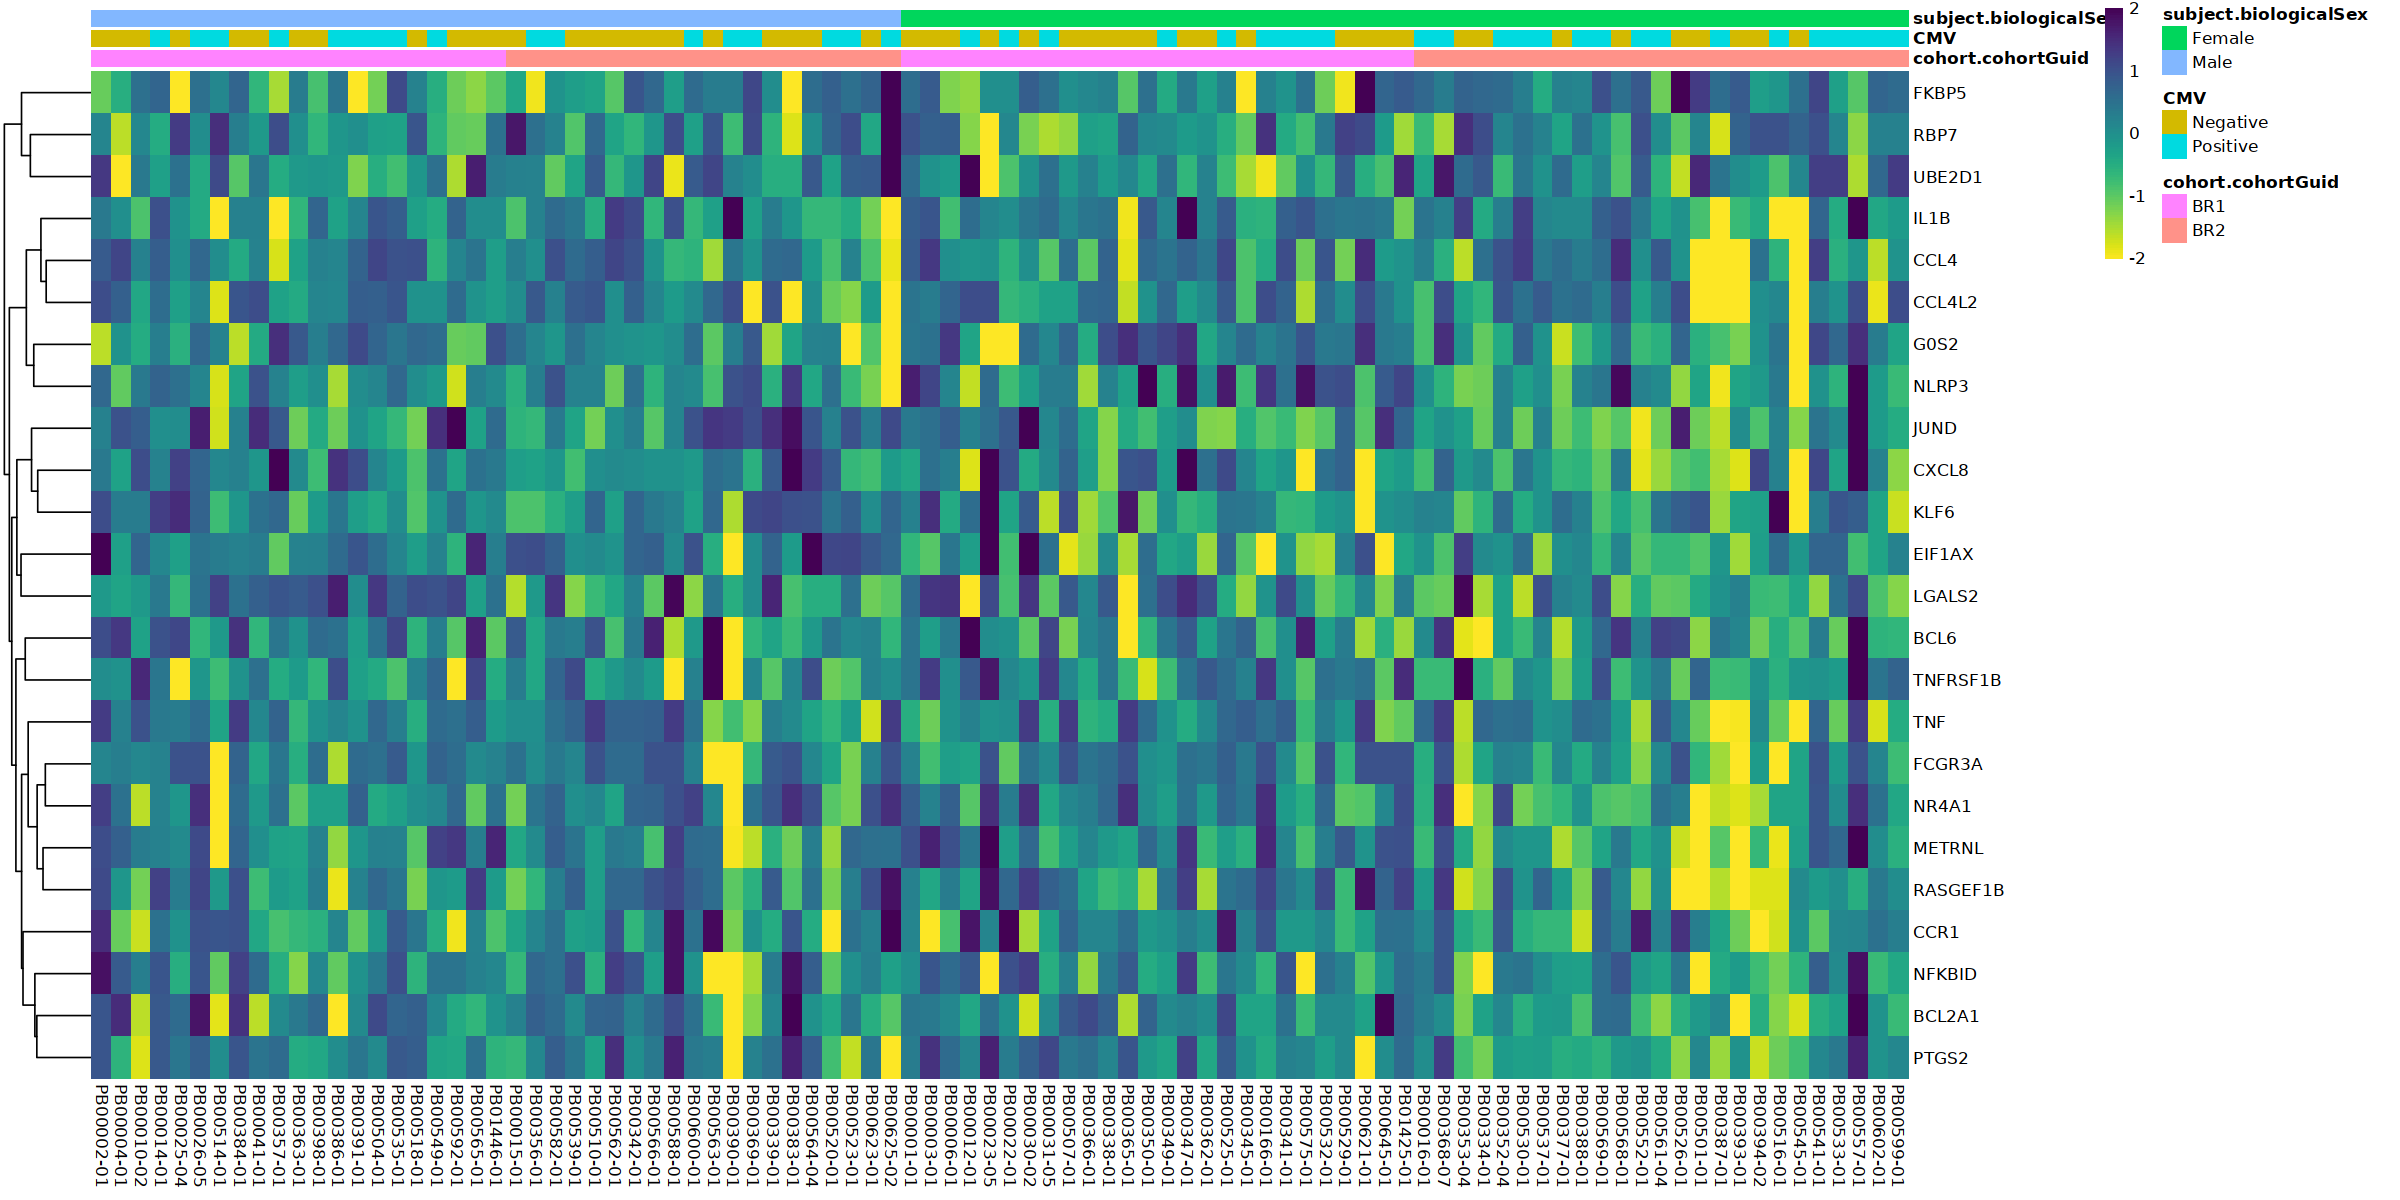

In [373]:
options(repr.plot.width = 20, repr.plot.height = 10)

pheatmap(merged_exp_matrix, breaks=breaks_sequence,
         cluster_rows=TRUE, annotation_col= mat_col,
         cluster_cols=FALSE,color= viridis(100),
         scale='row' )

In [276]:
head(merged_exp_matrix)

,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00025-04,PB00026-05,PB00514-01,PB00384-01,PB00041-01,PB00357-01,⋯,PB00387-01,PB00393-01,PB00394-02,PB00516-01,PB00545-01,PB00541-01,PB00533-01,PB00557-01,PB00602-01,PB00599-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BCL2A1,0.7684480,0.5610849,1.6493193,0.7758103,0.8730007,0.4689733,1.7252615,0.59267750,1.6467569,1.0582819,⋯,1.0458761,1.8196602,1.2702707,1.5291438,1.6941516,1.2610035,1.1999229,0.0000000,1.1113097,1.3308464
BCL6,0.1776042,0.1265123,0.4229147,0.1954974,0.1677465,0.4805574,0.3990590,0.11199236,0.4807291,0.2988602,⋯,0.2917610,0.3360289,0.5710461,0.4618547,0.5301434,0.3086388,0.5602166,0.0000000,0.4732558,0.4819506
CCL4,0.3326686,0.1586693,0.6395188,0.3463607,0.7586207,0.4419170,0.7461300,0.98758123,0.6535056,1.6745800,⋯,2.2546488,2.0974105,0.5117301,1.0696720,2.1232172,0.1123336,1.0452235,0.8207780,1.5787908,0.7953899
CCL4L2,0.0000000,0.1016094,0.5760539,0.1870789,0.5199025,0.3502128,1.1380465,0.05046743,0.0000000,0.5397049,⋯,1.3527080,1.3659634,0.4203606,0.3642417,1.3685515,0.2991654,0.4538391,0.0000000,1.1730440,0.0000000
CCR1,0.2245324,0.8026628,0.9388322,0.4529188,0.5673561,0.3433826,0.3490750,0.34722631,0.6560765,0.7512475,⋯,0.6458141,0.8173775,1.0620150,0.9544973,0.5690531,0.7898537,0.5322733,0.5295802,0.4550728,0.5014809
CXCL8,0.7529741,1.0689340,0.4673233,0.8403917,0.3920756,0.6226369,0.8759037,0.81775117,0.9754173,0.0000000,⋯,1.5785018,1.7120444,0.4090596,0.8220530,2.0920912,0.4289331,1.0861989,0.0000000,0.8295484,1.5003940


# IL1B+ CD14 monocyte p<0.4

In [1]:
# FEMALE
deseq2_result_Y1D0<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
# MALE
#deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [3]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female"

In [393]:
# Subset for genes of interest
genes_of_interest <- c("PTGS2", "BCL2A1", "NLRP3", "OAZ1", "G0S2", "CMTM6", "RASGEF1B", "RIPK2", "RABL6", 
                       "SGK1", "SELENOK", "METRNL", "MIDN", "DNAJC10", "BCL6", "PCBP2", "IL1B", "NR4A1", 
                       "FKBP5", "SOCS3", "EREG", "TNF", "SHTN1", "WARS", "BAG1", "CDKN2D", "ATP1B3", "RPLP2", "ATP5PD")

In [4]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(contrast=="cohort.cohortGuid",
       sex == "Female",
       Direction=="BR2",
      celltype=="IL1B+ CD14 monocyte") %>% 
      filter(padj<0.4)
      #gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [44]:
length(unique(deseq2_result_Y1D0_subset$gene))
unique(deseq2_result_Y1D0_subset$gene)

[1] 23

[1] "PTGS2"    "BCL2A1"   "NLRP3"    "OAZ1"     "G0S2"     "CMTM6"   
 [7] "RASGEF1B" "RIPK2"    "RABL6"    "SGK1"     "SELENOK"  "METRNL"  
[13] "MIDN"     "BCL6"     "IL1B"     "NR4A1"    "SOCS3"    "EREG"    
[19] "TNF"      "WARS"     "BAG1"     "CDKN2D"   "ATP1B3"

In [6]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [7]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [8]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female" "Male"

In [9]:
celltype_list <- lapply(df_list, function(df) { 
    df <- df[deseq2_result_Y1D0_subset$gene, grep("IL1B+ CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [10]:
dim(exp_matrix)

[1] 23 92

In [11]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [12]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [13]:
library(RColorBrewer)
library(viridis)

Loading required package: viridisLite



In [14]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

## Creating annotations (using mehul's)

In [15]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00007-01,Negative,BR1,Female


[1] 868

In [16]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00007-01,PB00007-01,Negative,BR1,Female


In [17]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [18]:
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00007-01,PB00007-01,Negative,BR1,Female,Female_BR1


In [19]:
df_subset <- exp_matrix

In [38]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
#facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
#cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors)
                          #facet = facet_colors,
                        #CMV = cmv_colors )



In [39]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Female_BR1


In [40]:
# library(readr)
# write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


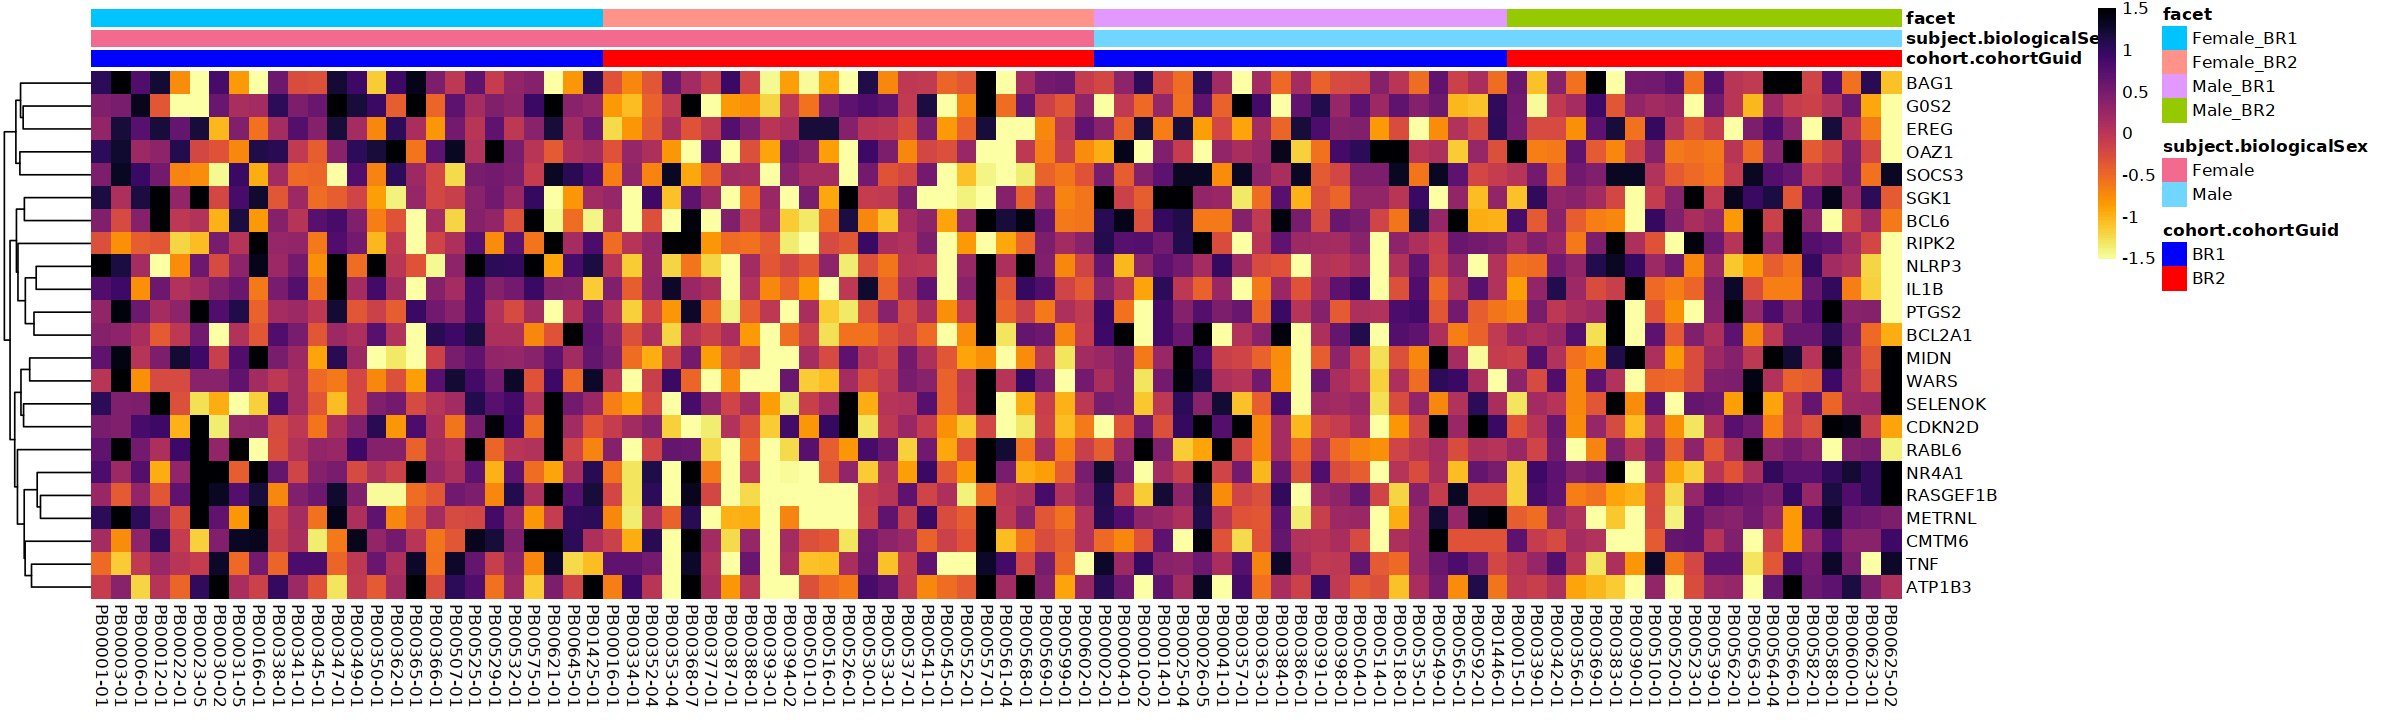

In [41]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(1.5, -1.5, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         color= inferno(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)


# IL1B+ CD14 monocyte p<0.1

In [449]:
# FEMALE
deseq2_result_Y1D0<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
# MALE
#deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [450]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female"

In [475]:
# Subset for genes of interest
genes_of_interest <- c("PTGS2", "BCL2A1", "NLRP3", "OAZ1", "G0S2", "CMTM6", "RASGEF1B", "RIPK2", "RABL6", 
                       "SGK1", "SELENOK")

In [476]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [477]:
length(unique(deseq2_result_Y1D0_subset$gene))

[1] 11

In [478]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [479]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [480]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female" "Male"

In [481]:
celltype_list <- lapply(df_list, function(df) { 
    df <- df[deseq2_result_Y1D0_subset$gene, grep("IL1B+ CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [482]:
dim(exp_matrix)

[1] 393  92

In [459]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [460]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [461]:
library(RColorBrewer)
library(viridis)

In [462]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

## Creating annotations (using mehul's)

In [463]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00007-01,Negative,BR1,Female


[1] 868

In [464]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00007-01,PB00007-01,Negative,BR1,Female


In [465]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [466]:
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00007-01,PB00007-01,Negative,BR1,Female,Female_BR1


In [467]:
df_subset <- exp_matrix

In [468]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV = cmv_colors )



In [469]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


In [470]:
# library(readr)
# write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


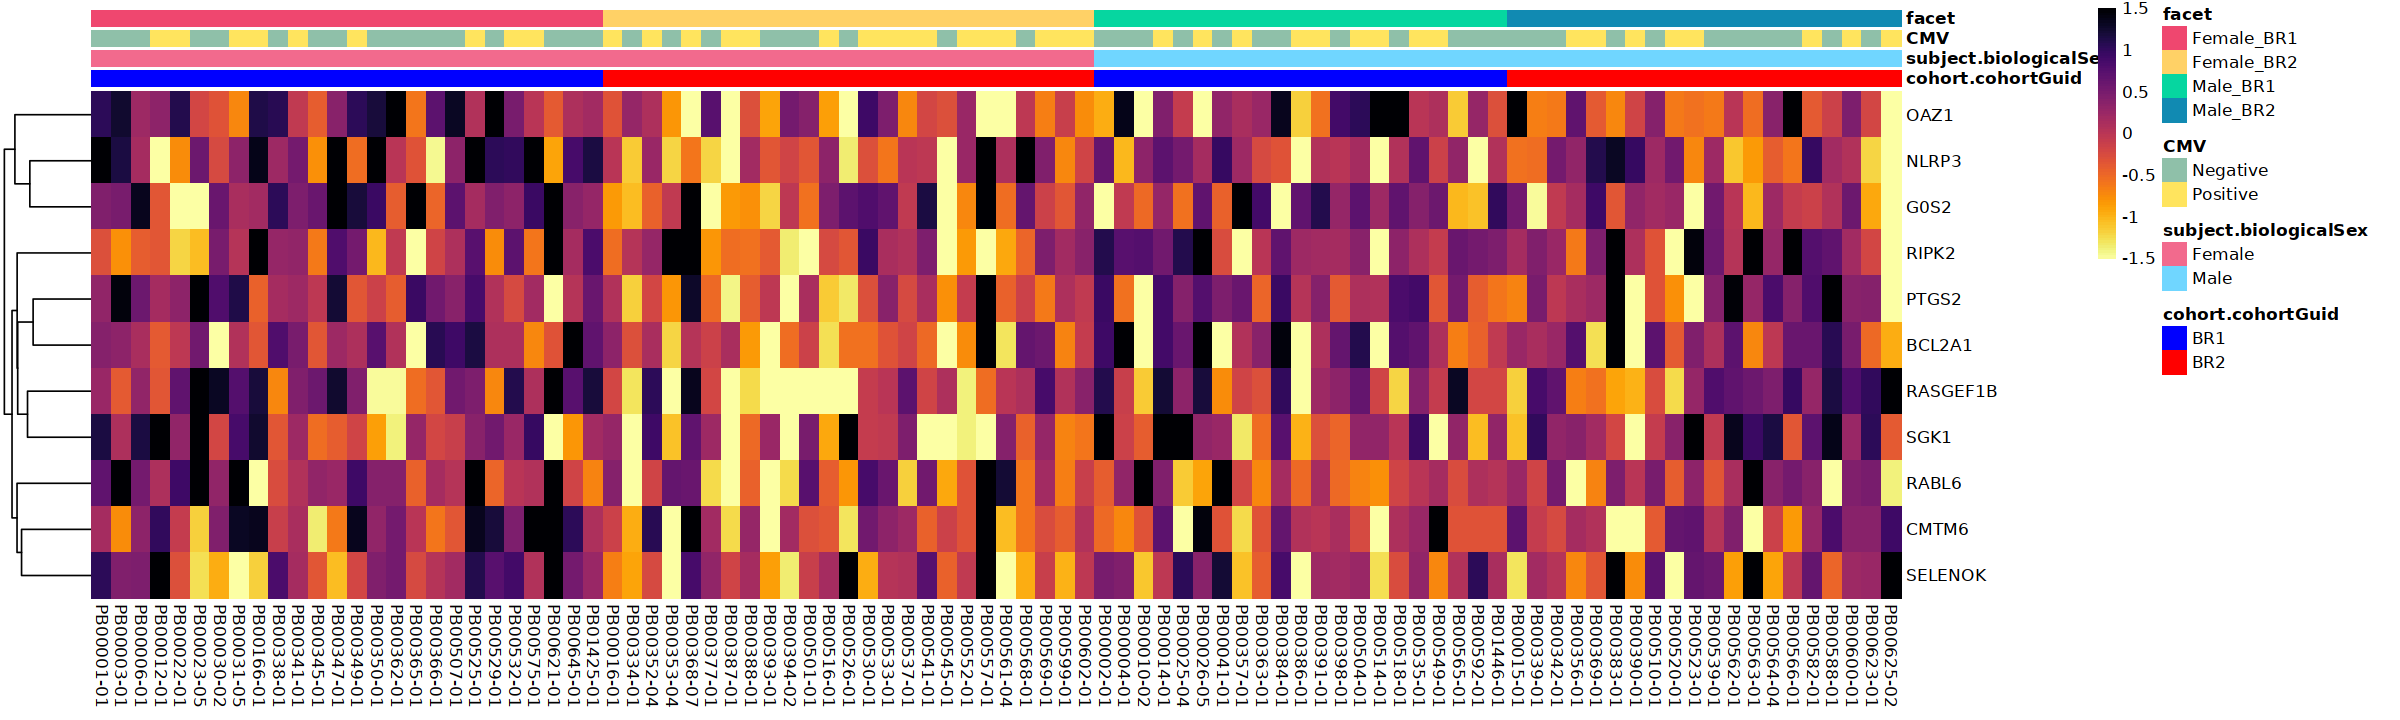

In [471]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(1.5, -1.5, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         color= inferno(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)


# Core+ CD14 monocyte p<0.4

In [42]:
# FEMALE
deseq2_result_Y1D0<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
# MALE
#deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [43]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female"

In [45]:
genes_of_interest <- c('PTGS2','BCL2A1','NLRP3','OAZ1','G0S2','CMTM6','RASGEF1B','RIPK2','RABL6','SGK1','SELENOK','METRNL','MIDN','BCL6','IL1B','NR4A1','SOCS3','EREG','TNF','WARS','BAG1','CDKN2D','ATP1B3')



In [46]:
# Subset for genes of interest
# genes_of_interest <- c("PTGS2", "BCL2A1", "NLRP3", "OAZ1", "G0S2", "CMTM6", "RASGEF1B", "RIPK2", "RABL6", 
#                        "SGK1", "SELENOK", "METRNL", "MIDN", "DNAJC10", "BCL6", "PCBP2", "IL1B", "NR4A1", 
#                        "FKBP5", "SOCS3", "EREG", "TNF", "SHTN1", "WARS", "BAG1", "CDKN2D", "ATP1B3", "RPLP2", "ATP5PD")

In [47]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(#contrast=="cohort.cohortGuid",
      # sex == "Female",
       #Direction=="BR2",
      celltype=="Core CD14 monocyte",
      #filter(padj<0.1)
      gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [48]:
length(unique(deseq2_result_Y1D0_subset$gene))

[1] 16

In [50]:
deseq2_result_Y1D0_subset

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
101850,1534.3632,0.201320327,0.09415895,2.1380901,0.03250943,0.3865426,cohort.cohortGuid,BR2,CDKN2D,Core CD14 monocyte,Female
101911,991.6206,0.094017744,0.04537488,2.0720218,0.03826341,0.4021694,cohort.cohortGuid,BR2,ATP1B3,Core CD14 monocyte,Female
102179,285.1337,0.395867959,0.21484974,1.8425340,0.06539708,0.4692693,cohort.cohortGuid,BR2,SOCS3,Core CD14 monocyte,Female
102260,891.6059,-0.140939719,0.07940484,-1.7749512,0.07590595,0.4899105,cohort.cohortGuid,BR1,SGK1,Core CD14 monocyte,Female
102293,1304.8483,0.129670135,0.07343251,1.7658411,0.07742251,0.4903975,cohort.cohortGuid,BR2,MIDN,Core CD14 monocyte,Female
102399,1013.1719,0.128025408,0.07497574,1.7075578,0.08771842,0.5004826,cohort.cohortGuid,BR2,METRNL,Core CD14 monocyte,Female
102658,2562.1612,0.057201841,0.03665623,1.5604945,0.11864308,0.5377703,cohort.cohortGuid,BR2,CMTM6,Core CD14 monocyte,Female
103385,1440.7996,0.089473704,0.07265209,1.2315365,0.21812228,0.6387509,cohort.cohortGuid,BR2,WARS,Core CD14 monocyte,Female
104132,1181.2751,0.031649971,0.03268507,0.9683312,0.33287901,0.7142433,cohort.cohortGuid,BR2,BAG1,Core CD14 monocyte,Female


In [51]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [52]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [53]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female" "Male"

In [54]:
celltype_list <- lapply(df_list, function(df) { 
    df <- df[deseq2_result_Y1D0_subset$gene, grep("Core CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [55]:
dim(exp_matrix)

[1] 16 92

In [56]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [57]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [58]:
library(RColorBrewer)
library(viridis)

In [59]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

## Creating annotations (using mehul's)

In [60]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00007-01,Negative,BR1,Female


[1] 868

In [61]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00007-01,PB00007-01,Negative,BR1,Female


In [62]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [63]:
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00007-01,PB00007-01,Negative,BR1,Female,Female_BR1


In [65]:
df_subset <- exp_matrix

In [66]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
#facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
#cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors) 
                         # facet = facet_colors,
                       # CMV = cmv_colors )



In [67]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Female_BR1


In [68]:
# library(readr)
# write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


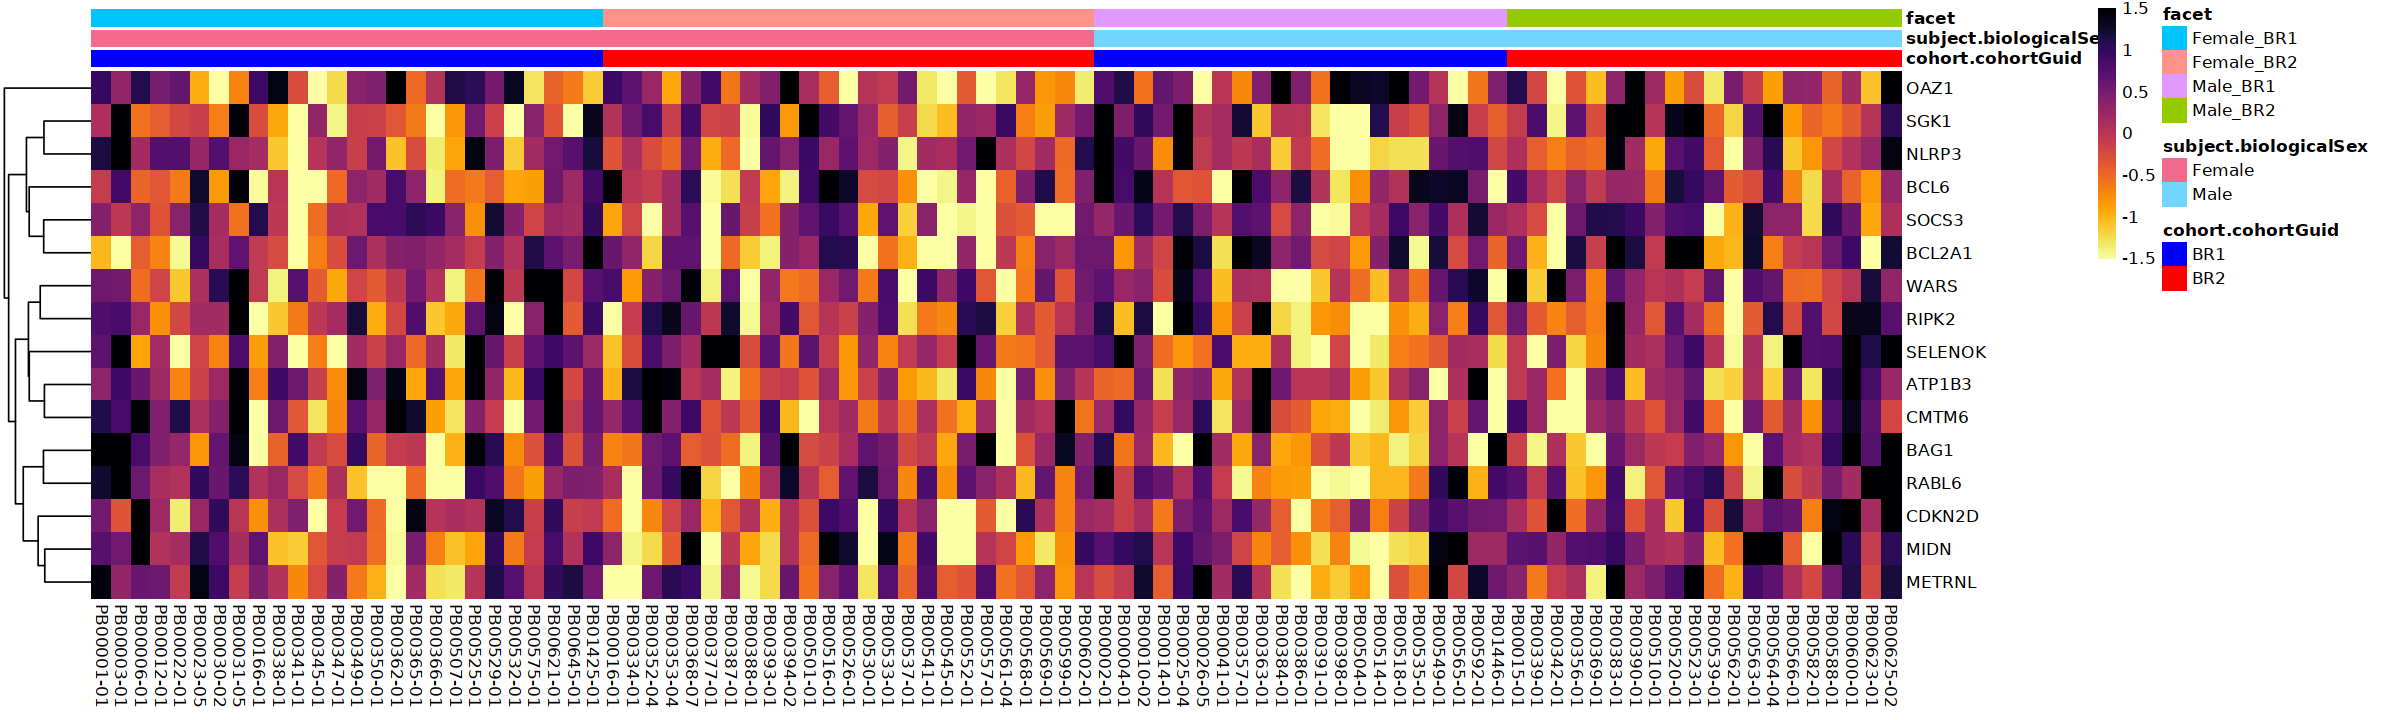

In [69]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(1.5, -1.5, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         color= inferno(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)


# Core+ CD14 monocyte p<0.1

In [534]:
# FEMALE
deseq2_result_Y1D0<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
# MALE
#deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [535]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female"

In [536]:
# Subset for genes of interest
genes_of_interest <- c("PTGS2", "BCL2A1", "NLRP3", "OAZ1", "G0S2", "CMTM6", "RASGEF1B", "RIPK2", "RABL6", 
                       "SGK1", "SELENOK")

In [537]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(#contrast=="cohort.cohortGuid",
      # sex == "Female",
       #Direction=="BR2",
      celltype=="Core CD14 monocyte",
      #filter(padj<0.1)
      gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [538]:
length(unique(deseq2_result_Y1D0_subset$gene))

[1] 8

In [539]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [540]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [541]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female" "Male"

In [542]:
celltype_list <- lapply(df_list, function(df) { 
    df <- df[deseq2_result_Y1D0_subset$gene, grep("Core CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [543]:
dim(exp_matrix)

[1]  8 92

In [544]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [545]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [546]:
library(RColorBrewer)
library(viridis)

In [547]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

## Creating annotations (using mehul's)

In [548]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00007-01,Negative,BR1,Female


[1] 868

In [549]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00007-01,PB00007-01,Negative,BR1,Female


In [550]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [551]:
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00007-01,PB00007-01,Negative,BR1,Female,Female_BR1


In [552]:
df_subset <- exp_matrix

In [553]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV = cmv_colors )



In [554]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


In [555]:
# library(readr)
# write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


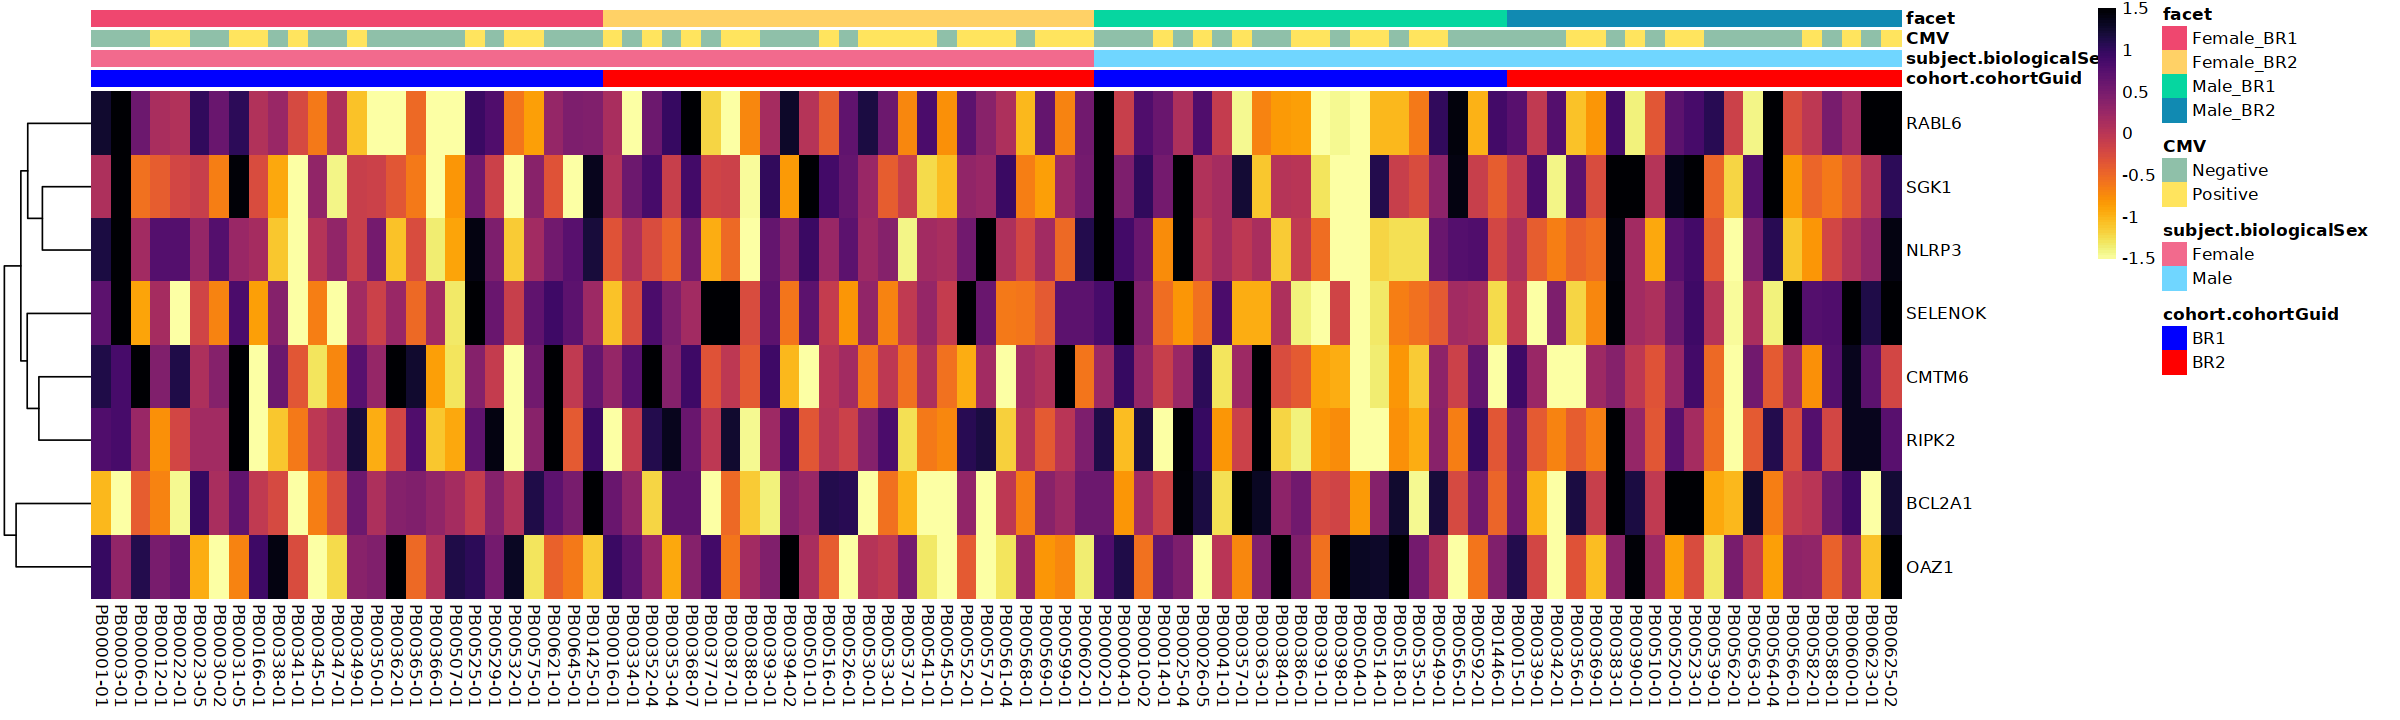

In [556]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(1.5, -1.5, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         color= inferno(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)


# ISG+ CD14 monocyte p<0.4

In [70]:
# FEMALE
deseq2_result_Y1D0<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
# MALE
#deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [71]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female"

In [72]:
genes_of_interest <- c('PTGS2','BCL2A1','NLRP3','OAZ1','G0S2','CMTM6','RASGEF1B','RIPK2','RABL6','SGK1','SELENOK','METRNL','MIDN','BCL6','IL1B','NR4A1','SOCS3','EREG','TNF','WARS','BAG1','CDKN2D','ATP1B3')



In [73]:
# Subset for genes of interest
# genes_of_interest <- c("PTGS2", "BCL2A1", "NLRP3", "OAZ1", "G0S2", "CMTM6", "RASGEF1B", "RIPK2", "RABL6", 
#                        "SGK1", "SELENOK", "METRNL", "MIDN", "DNAJC10", "BCL6", "PCBP2", "IL1B", "NR4A1", 
#                        "FKBP5", "SOCS3", "EREG", "TNF", "SHTN1", "WARS", "BAG1", "CDKN2D", "ATP1B3", "RPLP2", "ATP5PD")

In [74]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(#contrast=="cohort.cohortGuid",
      # sex == "Female",
       #Direction=="BR2",
      celltype=="ISG+ CD14 monocyte",
      #filter(padj<0.1)
      gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [75]:
length(unique(deseq2_result_Y1D0_subset$gene))

[1] 16

In [76]:
deseq2_result_Y1D0_subset

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
203149,34.21777,0.55668494,0.23245983,2.3947575,0.01663136,0.4446314,cohort.cohortGuid,BR2,SOCS3,ISG+ CD14 monocyte,Female
203377,47.87962,0.17962511,0.08664262,2.0731725,0.03815623,0.5022657,cohort.cohortGuid,BR2,RIPK2,ISG+ CD14 monocyte,Female
203610,346.52479,0.08160689,0.04470955,1.8252675,0.06796067,0.6054236,cohort.cohortGuid,BR2,CMTM6,ISG+ CD14 monocyte,Female
203696,129.60638,0.12455317,0.07076805,1.7600197,0.07840447,0.6227355,cohort.cohortGuid,BR2,METRNL,ISG+ CD14 monocyte,Female
203942,210.06233,0.16099491,0.10155000,1.5853758,0.11288097,0.6824367,cohort.cohortGuid,BR2,CDKN2D,ISG+ CD14 monocyte,Female
204422,193.39262,-0.08019106,0.05972540,-1.3426625,0.17938129,0.7387614,cohort.cohortGuid,BR1,BAG1,ISG+ CD14 monocyte,Female
204571,132.25079,0.13656318,0.10631868,1.2844702,0.19897747,0.7477442,cohort.cohortGuid,BR2,BCL2A1,ISG+ CD14 monocyte,Female
204846,138.63050,0.07362770,0.06366870,1.1564191,0.24750978,0.7918699,cohort.cohortGuid,BR2,ATP1B3,ISG+ CD14 monocyte,Female
205757,311.68191,0.07523716,0.08777441,0.8571651,0.39135366,0.8584869,cohort.cohortGuid,BR2,WARS,ISG+ CD14 monocyte,Female


In [77]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [78]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [79]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female" "Male"

In [80]:
celltype_list <- lapply(df_list, function(df) { 
    df <- df[deseq2_result_Y1D0_subset$gene, grep("ISG+ CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [81]:
dim(exp_matrix)

[1] 16 92

In [82]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [83]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [84]:
library(RColorBrewer)
library(viridis)

In [85]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

## Creating annotations (using mehul's)

In [86]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00007-01,Negative,BR1,Female


[1] 868

In [87]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00007-01,PB00007-01,Negative,BR1,Female


In [88]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [89]:
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00007-01,PB00007-01,Negative,BR1,Female,Female_BR1


In [90]:
df_subset <- exp_matrix

In [91]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
#facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
#cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors) 
                        #  facet = facet_colors,
                       # CMV = cmv_colors )



In [92]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Female_BR1


In [93]:
# library(readr)
# write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


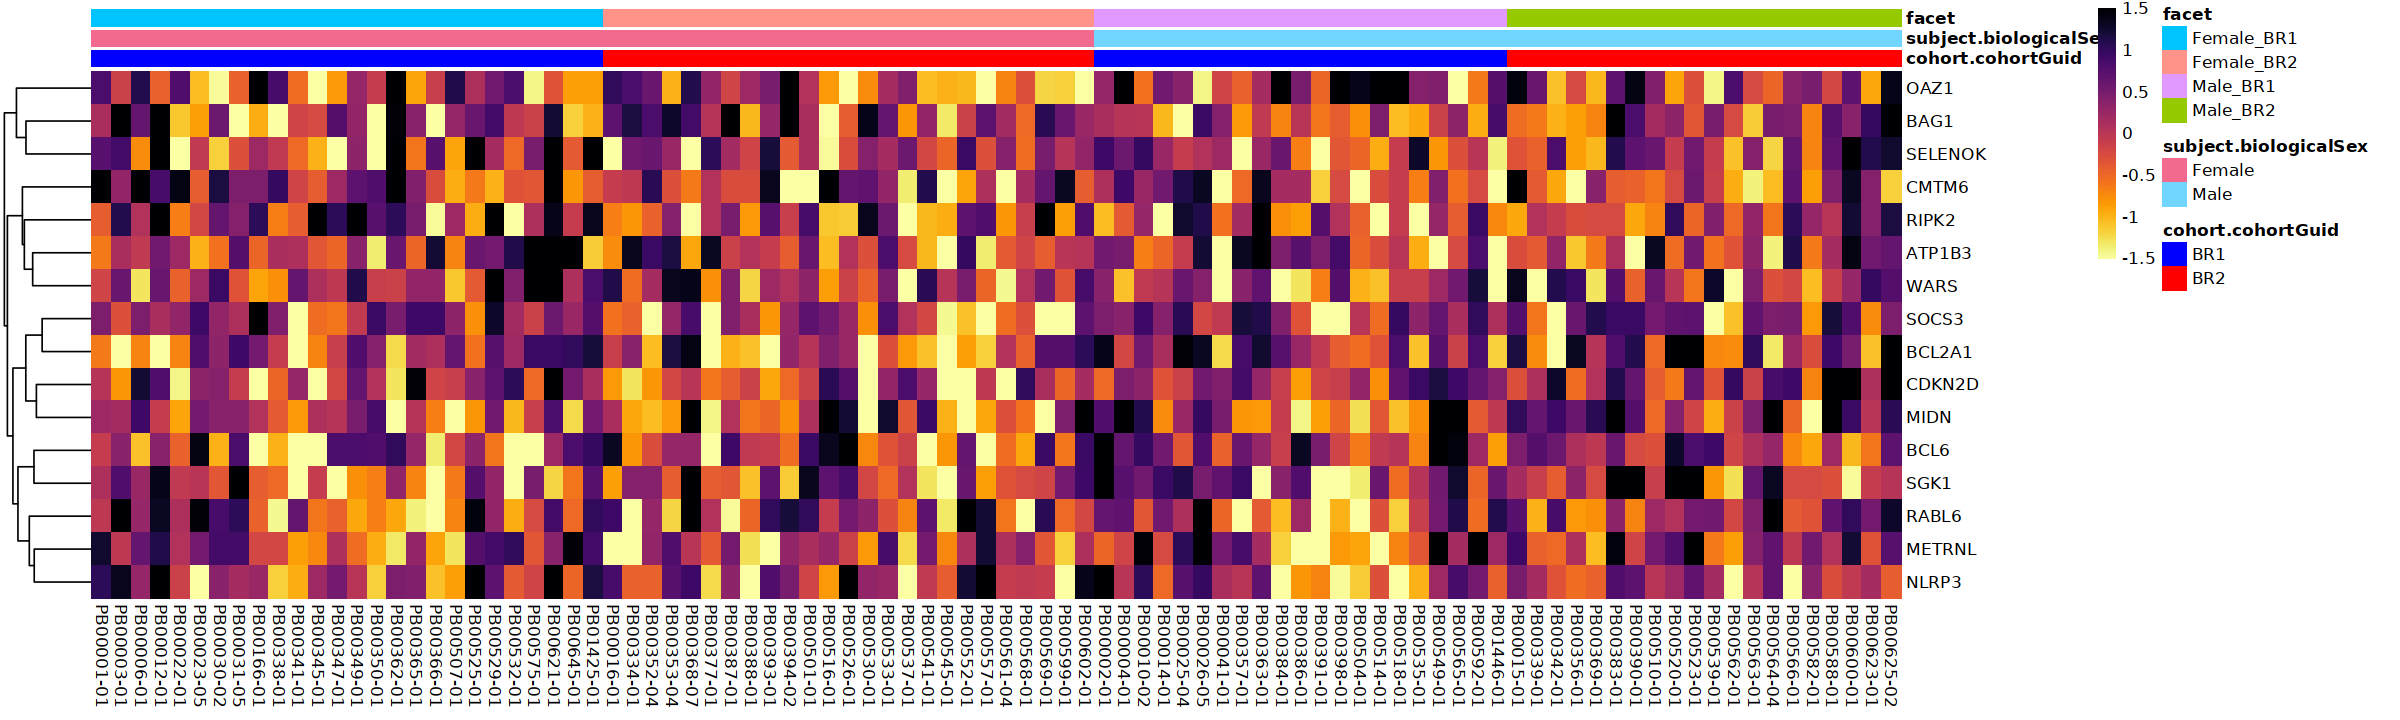

In [94]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(1.5, -1.5, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         color= inferno(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)


# ISG+ CD14 monocyte p<0.1

In [609]:
# FEMALE
deseq2_result_Y1D0<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
# MALE
#deseq2_result_Y1D0<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv')

In [612]:
head(deseq2_result_Y1D0)
unique(deseq2_result_Y1D0$sex)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


[1] "Female"

In [613]:
# Subset for genes of interest
genes_of_interest <- c("PTGS2", "BCL2A1", "NLRP3", "OAZ1", "G0S2", "CMTM6", "RASGEF1B", "RIPK2", "RABL6", 
                       "SGK1", "SELENOK")

In [614]:
deseq2_result_Y1D0_subset<-deseq2_result_Y1D0%>% 
filter(#contrast=="cohort.cohortGuid",
      # sex == "Female",
       #Direction=="BR2",
      celltype=="ISG+ CD14 monocyte",
      #filter(padj<0.1)
      gene %in% genes_of_interest)


#filter(padj<0.1, log2FoldChange>0.1)

In [615]:
length(unique(deseq2_result_Y1D0_subset$gene))

[1] 8

In [616]:
meta_data=read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv")

In [617]:
meta_data_subset=meta_data %>% filter(sample.visitName=="Flu Year 1 Day 0" )
aggregated_count_file_list<-paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/Average_LogNormalized_Expression_of_Celltypes_by_Sample_AIFI_L3/",meta_data_subset$pbmc_sample_id,".csv")

df_list<-mclapply(aggregated_count_file_list,function(x){
df<-read.csv(x,check.names = FALSE, row.names = 1)
colnames(df)<-paste0(gsub("^.*/(.*)\\.csv$", "\\1", x),":",colnames(df))
return (df)    
},mc.cores=60)

In [618]:
unique(meta_data_subset$subject.biologicalSex)

[1] "Female" "Male"

In [619]:
celltype_list <- lapply(df_list, function(df) { 
    df <- df[deseq2_result_Y1D0_subset$gene, grep("ISG+ CD14 monocyte", names(df), fixed = TRUE),drop=FALSE] })
exp_matrix<-do.call(cbind,celltype_list)

In [620]:
dim(exp_matrix)

[1]  8 92

In [621]:
colnames(exp_matrix)<-sub(":.*", "", colnames(exp_matrix))
rownames(meta_data_subset)<-meta_data_subset$pbmc_sample_id

In [622]:
meta_data_subset<-meta_data_subset %>% arrange(cohort.cohortGuid,subject.subjectGuid	)

In [623]:
library(RColorBrewer)
library(viridis)

In [624]:
colnames(meta_data_subset)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "lastUpdated"                              
 [4] "sample.id"                                
 [5] "sample.bridgingControl"                   
 [6] "sample.sampleKitGuid"                     
 [7] "sample.visitName"                         
 [8] "sample.visitDetails"                      
 [9] "sample.drawDate"                          
[10] "sample.daysSinceFirstVisit"               
[11] "file.id"                                  
[12] "file.name"                                
[13] "file.batchID"                             
[14] "file.panel"                               
[15] "file.pool"                                
[16] "file.fileType"                            
[17] "file.majorVersion"                        
[18] "subject.id"                               
[19] "subject.biologicalSex"                    
[20] "subject.birthYear"                        
[21] "subject.ethnicity"                        
[22] "subject.partnerCode"                      
[23] "subject.race"                             
[24] "subject.subjectGuid"                      
[25] "cohort.cohortGuid"                        
[26] "sample.diseaseStatesRecordedAtVisit"      
[27] "pbmc_sample_id"                           
[28] "subject.covidVaxDose1.daysSinceFirstVisit"
[29] "subject.covidVaxDose2.daysSinceFirstVisit"
[30] "Covid_exclusion"                          
[31] "subjectGuid"                              
[32] "CMV"

## Creating annotations (using mehul's)

In [625]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00007-01,Negative,BR1,Female


[1] 868

In [626]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00007-01,PB00007-01,Negative,BR1,Female


In [627]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [628]:
head(filtered_data)

,pbmc_sample_id,CMV,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00007-01,PB00007-01,Negative,BR1,Female,Female_BR1


In [629]:
df_subset <- exp_matrix

In [630]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV = cmv_colors )



In [631]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


In [632]:
# library(readr)
# write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


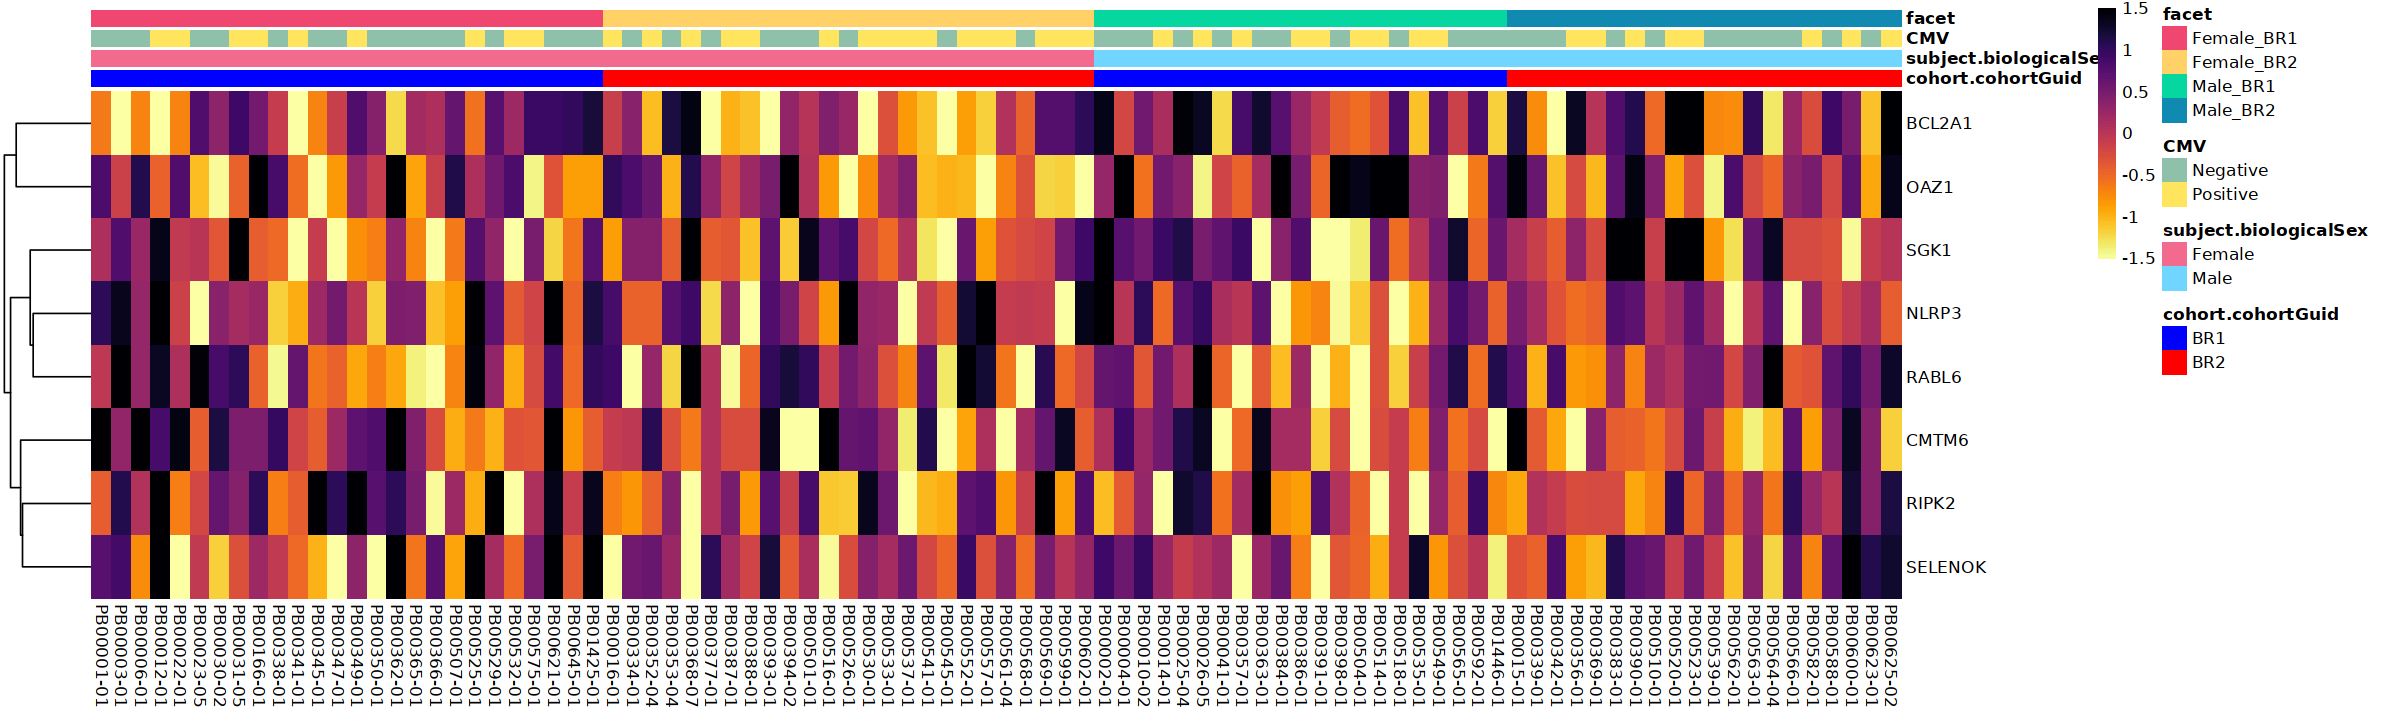

In [633]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(1.5, -1.5, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         color= inferno(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)
